# Sentiment Based Product Recommendation System

### PROBLEM STATEMENT:
The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks:

1. Data sourcing and sentiment analysis
2. Building a recommendation system
3. Improving the recommendations using the sentiment analysis model
4. Deploying the end-to-end project with a user interface

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from collections import Counter
import string

# importing nltk libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import FreqDist, pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, WhitespaceTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud

# importing modelling libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, classification_report
import pickle

import warnings
warnings.filterwarnings("ignore") 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
pd.set_option('display.max_columns', 200)

In [3]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# library for class imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [5]:
# Mounting google drive to import Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = "/content/drive/MyDrive/Colab Notebooks/SBPRS/sample30.csv"
f = open(path)
df = pd.read_csv(f, sep=',')

In [7]:
# reading data
df.head(10)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,NaN,NaN,samantha,Negative
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,False,1,Bought this earlier today and was excited to c...,Disappointing,NaN,NaN,raeanne,Negative
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,False,1,I bought this product for my husband and I to ...,Not happy at all,NaN,NaN,kimmie,Negative
8,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-28T00:00:00.000Z,False,False,1,My husband and I bought this for some extra fu...,Very disappointing,NaN,NaN,cassie,Negative
9,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-21T00:00:00.000Z,False,False,1,Got as a surprise for my husband there is noth...,Don't buy,NaN,NaN,moore222,Positive


**OBSERVATION:** For user AV16khLE-jtxr-f38VFn, 10th record, there is a mismatch for the column **user_sentiment** even when the review is clearly negative. 
We will need to correct such records. 

## EDA - Data Cleaning and Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [9]:
# checking missing values
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

**OBSERVATION:**
- reviews_username - 63 records are missing, we will drop the rows corresponding to null values as this column is users identity
- reviews_doRecommend - for less than 10% records are missing, so we will drop them
- user_sentiment, only 1 record is null, we will handle it manually 
- For manufacturer, reviews_userCity and reviews_userProvince, we will fill 'NULL' string as this is not required column
- For reviews_didPurchase, impute 'NO' for null values
- create a new column adding both title and text of review

In [10]:
# user_sentiment is null for one record. Lets handle it manually
df[df.user_sentiment.isnull()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,NaN,True,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,NaN,mamad,7.87E+11,NaN


In [11]:
# based on review_rating and text, review looks positive
df['user_sentiment'] = df['user_sentiment'].fillna('Positive')

In [12]:
# handling missing values
df = df[~df['reviews_username'].isnull()]
df = df[~df['reviews_doRecommend'].isnull()]

df['reviews_userCity'] = df['reviews_userCity'].fillna('NULL')
df['reviews_userProvince'] = df['reviews_userProvince'].fillna('NULL')
df['manufacturer'] = df['manufacturer'].fillna('NULL')
df['reviews_didPurchase'] = df['reviews_didPurchase'].fillna('NO')

#### Feature Engineering

In [13]:
# creating reviews_titletext column after merging title and text
df['reviews_title_text'] = df['reviews_title'].fillna('') + ' ' + df['reviews_text']

In [14]:
# dropping text and title column
df.drop(columns=["reviews_title", "reviews_text"], inplace=True)

In [15]:
df.shape

(27396, 14)

In [16]:
# lets check null values again
df.isnull().sum()

id                      0
brand                   0
categories              0
manufacturer            0
name                    0
reviews_date            0
reviews_didPurchase     0
reviews_doRecommend     0
reviews_rating          0
reviews_userCity        0
reviews_userProvince    0
reviews_username        0
user_sentiment          0
reviews_title_text      0
dtype: int64

**OBSERVATION:** Data looks good

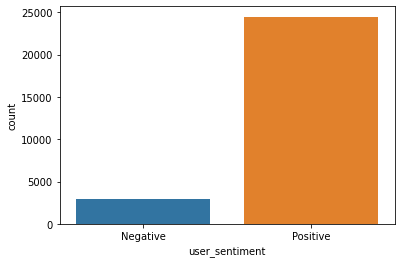

In [17]:
# creating plot to check the ratio of user_sentiment
plt.figure()
sns.countplot(x = 'user_sentiment', data = df)
plt.show()

**OBSERVATION:** Class imbalance is there, which needs to be taken care

We previously saw that for some records, **user_sentiment** is not matching with the review and recommendation by the user. Lets fix this by creating a column sentiment_true.

In [18]:
df['sentiment_true'] = df.apply(lambda x : 'Positive' if ((x.reviews_rating > 2) and (x.reviews_doRecommend)) else 'Negative', axis = 1)

In [19]:
df['sentiment_true'].value_counts()

Positive    25747
Negative     1649
Name: sentiment_true, dtype: int64

In [20]:
df['user_sentiment'].value_counts()

Positive    24460
Negative     2936
Name: user_sentiment, dtype: int64

In [21]:
# Lets have a look at the mismatch in sentiment
df[~(df.sentiment_true == df.user_sentiment)].head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews_title_text,sentiment_true
9,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-21T00:00:00.000Z,False,False,1,NULL,NULL,moore222,Positive,Don't buy Got as a surprise for my husband the...,Negative
11,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-05T00:00:00.000Z,False,False,1,NULL,NULL,bre234,Positive,Waste of Money Purchased this thinking it woul...,Negative
14,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-09T00:00:00.000Z,False,False,1,NULL,NULL,nicole,Positive,Disappointed First time purchase of this type ...,Negative
42,AV1h6Gu0glJLPUi8IjA_,Johnson's,"Personal Care,Baby Care,Baby Bubble Bath,Baby,...",Johnson's,"Johnson's Baby Bubble Bath and Wash, 15oz",2014-11-05T00:00:00.000Z,False,True,3,NULL,NULL,gardenbunny318,Negative,It's bubble bath. You would think it's conveni...,Positive
54,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2014-09-01T00:00:00.000Z,False,False,1,NULL,NULL,alnscoob97,Positive,New formula is terrible I used (and loved) thi...,Negative


**OBSERVATION:** Now the data looks good and fixed

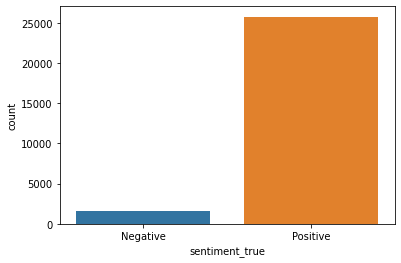

In [22]:
# Sentiment_true frequency plot showing class imbalance
sns.countplot(x = 'sentiment_true', data = df)
plt.show()

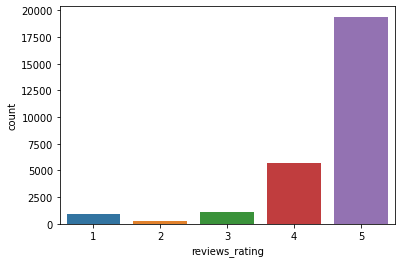

In [23]:
# reviews_rating frequency distribution
sns.countplot(x='reviews_rating', data= df)
plt.show()

**OBSERVATION:** Customers are mostly happy as there are more number of higher ratings 4 and 5

In [24]:
df["reviews_rating"].value_counts()

5    19384
4     5684
3     1148
1      886
2      294
Name: reviews_rating, dtype: int64

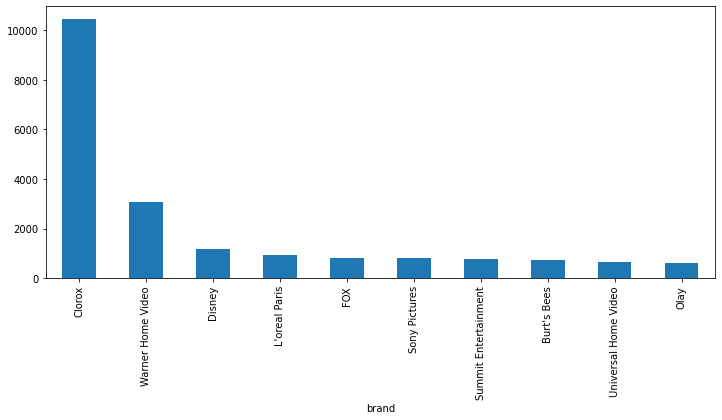

In [25]:
# Top 10 recommended brands
plt.figure(figsize=(12,5)) 
df[df['sentiment_true']=='Positive'].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar')
plt.show()

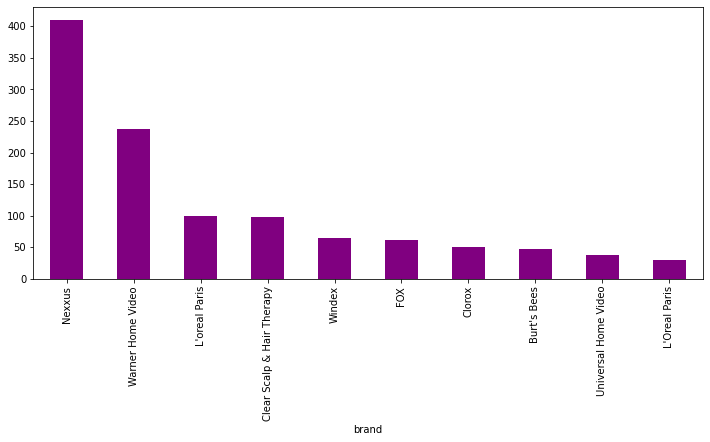

In [26]:
# Least favourite 10 brands
plt.figure(figsize=(12,5)) 
df[df['sentiment_true']=='Negative'].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar', color='purple')
plt.show()

**OBSERVATION:** 
- Clorox is most favourite brand and Nexxus is least favourite
- Warner Home video have mixed reviews with both positive and negative sentiments

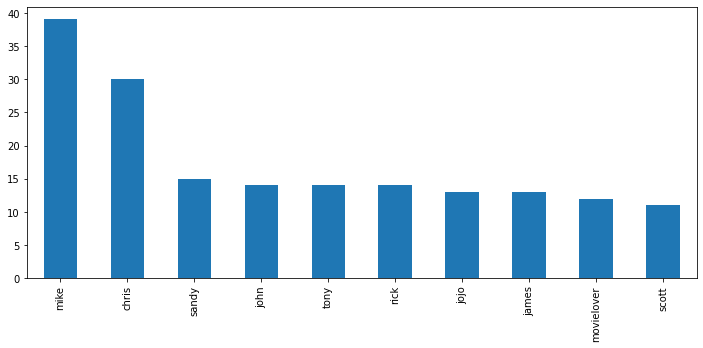

In [27]:
#Let's find out the most common users.
plt.figure(figsize=(12,5)) 
df["reviews_username"].value_counts()[:10].plot(kind='bar')
plt.show()

#### Cleaning Review Text

In [28]:
# function to get pos tags which are used during lemmatization
def get_pos_tags(pos):
    if pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('R'):
        return wordnet.ADV
    return wordnet.NOUN

In [29]:
# removing the words from the stopwords list which have negative emotions and are important to be accounted
stopwords_list = set(stopwords.words('english')) - {"doesn't", "don't", "can't", "won't", "isn't", "wasn't", "shouldn't", "wouldn't", "couldn't",
                       "no", "not", "never", "nothing", "neither", "none", "nowhere"}

# function to clean the text and remove all the unnecessary elements.
def clean_lemmatized_text(text):
    # text to lowercase    
    text = text.lower()

    # removing puncutation
    dictionary = "abc".maketrans('', '', string.punctuation)
    text = text.translate(dictionary)
    
    # tokenizing
    text = [word.replace('[^\w\s]','') for word in text.split(' ')]    
    
    # removing numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # removing stopwords based on filtered list
    text = [x for x in text if x not in stopwords_list]
    
    # removing empty tokens
    text = [t for t in text if len(t) > 0]
    
    # getting pos tags
    pos_tags = pos_tag(text)
    
    # Lemmatizing the text
    text = [WordNetLemmatizer().lemmatize(word[0], get_pos_tags(word[1])) for word in pos_tags]
    
    # removing word which are single letter
    text = [word for word in text if len(word) > 1]
    
    # concatenating to form clean text
    text = ' '.join(text)
    
    return text

In [30]:
%time
df['clean_review'] = df.apply(lambda x : clean_lemmatized_text(x['reviews_title_text']), axis = 1)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [31]:
# reset index
df.reset_index(inplace = True, drop = True)

In [32]:
# checking dataframe for clean lemmatized text
df[['id', 'reviews_username', 'sentiment_true', 'reviews_title_text', 'clean_review']].head()

,id,reviews_username,sentiment_true,reviews_title_text,clean_review
0,AV16khLE-jtxr-f38VFn,rebecca,Negative,Disappointed I read through the reviews on her...,disappoint read review look buy one couple lub...
1,AV16khLE-jtxr-f38VFn,walker557,Negative,Irritation My husband bought this gel for us. ...,irritation husband buy gel gel caused irritati...
2,AV16khLE-jtxr-f38VFn,samantha,Negative,Not worth it My boyfriend and I bought this to...,not worth boyfriend bought spice thing bedroom...
3,AV16khLE-jtxr-f38VFn,raeanne,Negative,Disappointing Bought this earlier today and wa...,disappoint buy earlier today excite check base...
4,AV16khLE-jtxr-f38VFn,kimmie,Negative,Not happy at all I bought this product for my ...,not happy buy product husband try not impresse...


Positive    93.980873
Negative     6.019127
Name: sentiment_true, dtype: float64


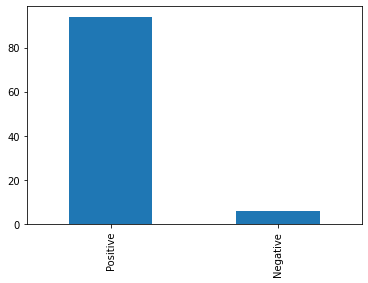

In [33]:
# As we have seen that there is an imbalance in data
# Lets check imbalance by percentage
sentiment_perc = 100 * df['sentiment_true'].value_counts()/len(df)
print(sentiment_perc)
sentiment_perc.plot.bar()
plt.show()

**OBSERVATION:** Positive sentiment is 94% and negative is almost 6%

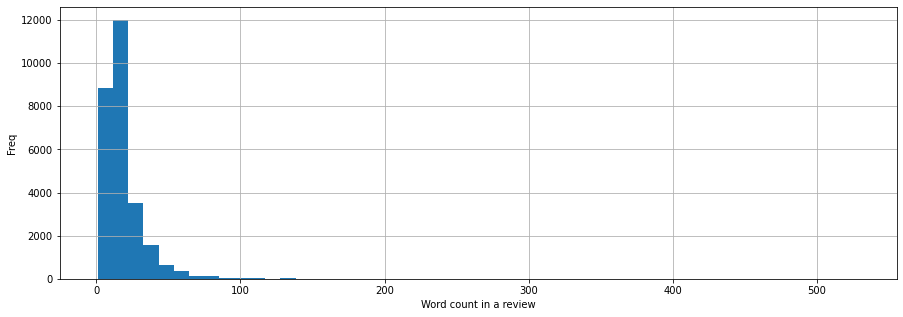

In [34]:
# Review length plot
plt.figure(figsize = (15,5))
review_word_count = df.clean_review.apply(lambda x: len(x.split(' ')))
review_word_count.hist(bins = 50)
plt.xlabel('Word count in a review')
plt.ylabel('Freq')
plt.show()

In [35]:
print('Average num of words per review:', review_word_count.mean())
print('Skewness:', review_word_count.skew())

Average num of words per review: 18.761023507081326
Skewness: 5.037542293862477


#### WORDCLOUDS for both the sentiments

In [36]:
positive_reviews = df.loc[df.sentiment_true=='Positive',['clean_review']]
negative_reviews = df.loc[df.sentiment_true=='Negative',['clean_review']]

In [37]:
positive_reviews

,clean_review
14,pretty nice buy well review jelly feel like di...
16,love notice product clearance store shop frequ...
17,good time use product couple time since recive...
18,job use time stays bit sticky not bad well pro...
19,great sensation good product give great feeling
...,...
27391,softness get conditioner influenster try im lo...
27392,love love receive review purpose influenster l...
27393,hair smooth use first love smell product wash ...
27394,perfect oily hair receive influenster never go...


In [38]:
negative_reviews

,clean_review
0,disappoint read review look buy one couple lub...
1,irritation husband buy gel gel caused irritati...
2,not worth boyfriend bought spice thing bedroom...
3,disappoint buy earlier today excite check base...
4,not happy buy product husband try not impresse...
...,...
26734,decent conditioner great price receive along c...
26758,good smell little heavy really love way condit...
26778,smell great conditioner great although wasnt s...
27224,amaze get influenster voxbox im glad extraordi...


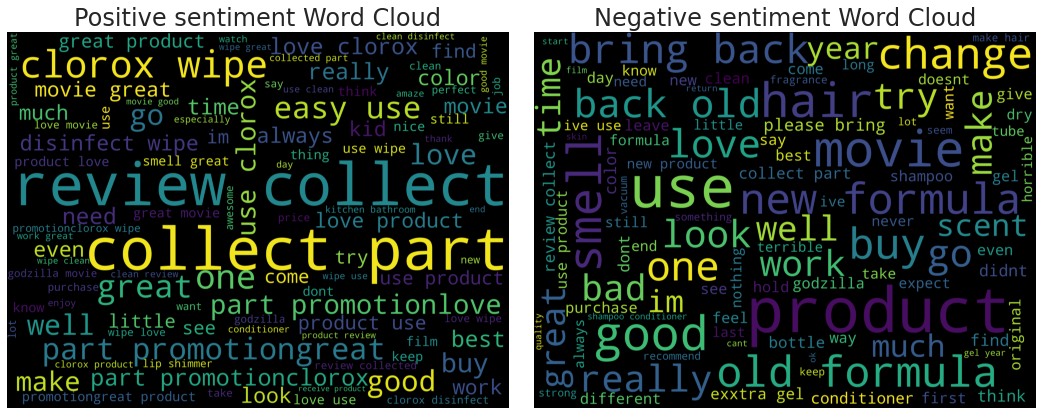

In [39]:
# wordcloud for positive reviews

sns.set(font_scale=2)
plt.figure(figsize = (15,10))

# wordcloud for positive sentiment
plt.subplot(1, 2, 1)
plt.title('Positive sentiment Word Cloud')

word_cloud_text = ''.join(positive_reviews['clean_review'])
wordcloud = WordCloud(max_font_size = 100, # Maximum font size for the most frequent word
                      max_words = 100, # max number of words
                      background_color = 'Black', # Background color
                      scale = 10, # Scaling between computation and drawing
                      width = 800, # Width of the canvas
                      height = 600 # Height of the canvas
                     ).generate(word_cloud_text)

plt.imshow(wordcloud, interpolation='bilinear') # to make the display image appear smooth
plt.axis('off')
plt.tight_layout()

# wordcloud for negative sentiment
plt.subplot(1, 2, 2)
plt.title('Negative sentiment Word Cloud')

word_cloud_text = ''.join(negative_reviews['clean_review'])
wordcloud = WordCloud(max_font_size = 100, # Maximum font size for the most frequent word
                      max_words = 100, # max number of words
                      background_color = 'Black', # Background color
                      scale = 10, # Scaling between computation and drawing
                      width = 800, # Width of the canvas
                      height = 600 # Height of the canvas
                     ).generate(word_cloud_text)

plt.imshow(wordcloud, interpolation='bilinear') # to make the displayed image appear smooth
plt.axis("off")
plt.tight_layout()

In [40]:
# mapping positive sentiment to 1 and vice-versa
df['sentiment_encoded'] = np.where(df['sentiment_true'] == 'Positive', 1, 0)
df['sentiment_encoded'].value_counts()

1    25747
0     1649
Name: sentiment_encoded, dtype: int64

In [41]:
df[['id', 'reviews_username', 'clean_review', 'sentiment_encoded']].head(15)

,id,reviews_username,clean_review,sentiment_encoded
0,AV16khLE-jtxr-f38VFn,rebecca,disappoint read review look buy one couple lub...,0
1,AV16khLE-jtxr-f38VFn,walker557,irritation husband buy gel gel caused irritati...,0
2,AV16khLE-jtxr-f38VFn,samantha,not worth boyfriend bought spice thing bedroom...,0
3,AV16khLE-jtxr-f38VFn,raeanne,disappoint buy earlier today excite check base...,0
4,AV16khLE-jtxr-f38VFn,kimmie,not happy buy product husband try not impresse...,0
5,AV16khLE-jtxr-f38VFn,cassie,disappointing husband buy extra fun werevboth ...,0
6,AV16khLE-jtxr-f38VFn,moore222,dont buy get surprise husband nothing special ...,0
7,AV16khLE-jtxr-f38VFn,jds1992,pretty dissapoitned tried husband felt no diff...,0
8,AV16khLE-jtxr-f38VFn,bre234,waste money purchase think would sort warm eff...,0
9,AV16khLE-jtxr-f38VFn,jds1992,waste money buy enhance time bit abslutely not...,0


In [42]:
def Most_Freq_Words(reviews, n_most_common):

    # Creating list of words in lowercase
    flattened_reviews = [word for review in reviews for word in \
                         review.lower().split()]
    # removing punctuation
    flattened_reviews = [''.join(char for char in review if \
                                 char not in string.punctuation) for \
                         review in flattened_reviews]
    # removing empty strings from the list
    flattened_reviews = [review for review in flattened_reviews if review]

    return Counter(flattened_reviews).most_common(n_most_common)

In [43]:
pos_reviews = df[df['sentiment_encoded']==1]
Most_Freq_Words(pos_reviews['clean_review'],10)

[('great', 13791),
 ('love', 11882),
 ('use', 11093),
 ('movie', 10293),
 ('product', 10205),
 ('review', 8590),
 ('part', 8471),
 ('wipe', 8201),
 ('promotion', 8144),
 ('clean', 7877)]

In [44]:
neg_reviews = df[df['sentiment_encoded']==0]
Most_Freq_Words(neg_reviews['clean_review'],10)

[('not', 1277),
 ('product', 1038),
 ('use', 920),
 ('formula', 879),
 ('new', 781),
 ('hair', 759),
 ('old', 637),
 ('gel', 561),
 ('like', 539),
 ('movie', 537)]

**OBSERVATION:** The most frequent words for both positive and negative reviews are in line with the word cloud

### FEATURE EXTRACTION using TF_IDF vectorizer

In [45]:
tf_idf_vectorizer = TfidfVectorizer(
    stop_words = stopwords_list,
    max_features=2000, 
    max_df=0.9,
    strip_accents = 'unicode',
    analyzer = 'word',    
    token_pattern = r'\w{1,}',
    tokenizer= word_tokenize,
    ngram_range = (1, 3),  
    sublinear_tf = True)

X_tfidf= tf_idf_vectorizer.fit_transform(df['clean_review'])

In [46]:
X_tfidf.shape

(27396, 2000)

In [47]:
print(tf_idf_vectorizer.get_feature_names_out())

['able' 'absolute' 'absolutely' ... 'yr' 'yummy' 'zombie']


In [48]:
# saving tf-idf vectorizer pickle file
filename = "tfidf_vectorizer.pkl"
with open(filename, 'wb') as file:
    pickle.dump(tf_idf_vectorizer, file)

In [49]:
# loading tf-idf vectorizer pickle file
with open(filename, 'rb') as file:
    tf_idf_vectorizer = pickle.load(file)

### Train-Test Data Split

In [50]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, df['sentiment_encoded'], test_size = 0.2, random_state = 42)

In [51]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print(y_train_tfidf.shape)
print(y_test_tfidf.shape)

(21916, 2000)
(5480, 2000)
(21916,)
(5480,)


In [52]:
y_train_tfidf.value_counts()

1    20579
0     1337
Name: sentiment_encoded, dtype: int64

In [53]:
y_test_tfidf.value_counts()

1    5168
0     312
Name: sentiment_encoded, dtype: int64

## CLASSIFICATION - MODEL BUILDING


### 1. Logistic Regression

##### Without SMOTE

In [54]:
%time
lr = LogisticRegression(random_state=42)
lr.fit(X_train_tfidf, y_train_tfidf.ravel())

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


LogisticRegression(random_state=42)

In [55]:
# Predicting Train Data
y_pred_train_lr = lr.predict(X_train_tfidf)

In [56]:
# Creating report summary
def get_Report(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print("*"*80)
    print('')

    print('Accuracy : ', accuracy_score(y_true, y_pred))    
    print('Recall: ', recall_score(y_true, y_pred))
    print('Precision: ', precision_score(y_true, y_pred))
    print('F1 score: ', f1_score(y_true, y_pred))
    print("*"*80)
    print('')
    
    # Confusion Matrix
    sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true, y_pred), display_labels = [0,1])
    cm_display.plot()
    plt.show()
    print("*"*80)
    print(' ')

    # ROC curve
    metrics.RocCurveDisplay.from_predictions(y_true, y_pred)
    metric_summary = []
    metric_summary.append(round(accuracy_score(y_true, y_pred), 2))
    metric_summary.append(round(recall_score(y_true, y_pred), 2))
    metric_summary.append(round(precision_score(y_true, y_pred), 2))
    metric_summary.append(round(f1_score(y_true, y_pred), 2))
    return metric_summary

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      1337
           1       0.97      1.00      0.98     20579

    accuracy                           0.97     21916
   macro avg       0.96      0.74      0.81     21916
weighted avg       0.97      0.97      0.96     21916

********************************************************************************

Accuracy :  0.9666453732432926
Recall:  0.9981534574080373
Precision:  0.967363662051427
F1 score:  0.9825173988950805
********************************************************************************



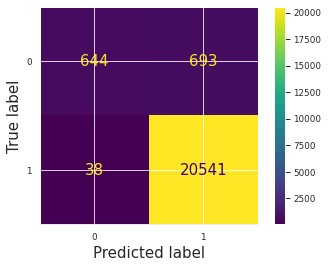

********************************************************************************
 


[0.97, 1.0, 0.97, 0.98]

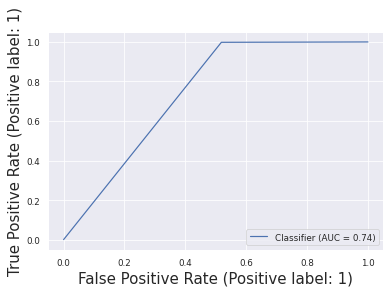

In [57]:
# Performance report on Train data
get_Report(y_train_tfidf, y_pred_train_lr)

Logistic Regression accuracy 0.9656934306569344
              precision    recall  f1-score   support

           0       0.92      0.44      0.59       312
           1       0.97      1.00      0.98      5168

    accuracy                           0.97      5480
   macro avg       0.94      0.72      0.79      5480
weighted avg       0.96      0.97      0.96      5480

********************************************************************************

Accuracy :  0.9656934306569344
Recall:  0.9976780185758514
Precision:  0.9669917479369843
F1 score:  0.9820952380952381
********************************************************************************



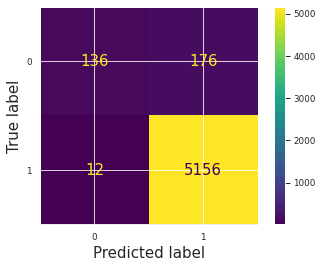

********************************************************************************
 


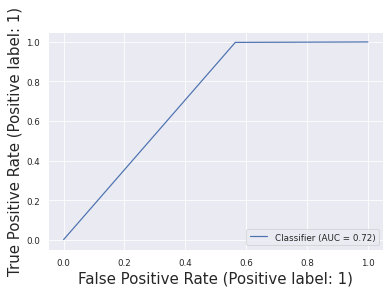

In [58]:
# Prediction on Test Data
y_pred_test_lr = lr.predict(X_test_tfidf)

# Performance report on Test data
print("Logistic Regression accuracy", accuracy_score(y_test_tfidf, y_pred_test_lr))
lr_test_perf = get_Report(y_test_tfidf, y_pred_test_lr)

In [60]:
# Model comparison computation
df_compare_metrics = pd.DataFrame({'Metrics': ['Accuracy','Recall','Precision','F1 Score'], 'LR w/o smote': lr_test_perf},
                             columns = ['Metrics', 'LR w/o smote']
                             )
df_compare_metrics

,Metrics,LR w/o smote
0,Accuracy,0.97
1,Recall,1.00
2,Precision,0.97
3,F1 Score,0.98


##### LR with Smote

In [61]:
counter = Counter(y_train_tfidf)
print('Before', counter)

Before Counter({1: 20579, 0: 1337})


In [62]:
sm = SMOTE()

# class imbalance treated by smote
X_train_tfidf_sm, y_train_tfidf_sm = sm.fit_resample(X_train_tfidf, y_train_tfidf)

# checking the count
counter = Counter(y_train_tfidf_sm)
print('After', counter)

After Counter({1: 20579, 0: 20579})


In [63]:
%time
lr = LogisticRegression()
lr.fit(X_train_tfidf_sm, y_train_tfidf_sm.ravel())

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


LogisticRegression()

In [64]:
# Predicting Train data
y_pred_train_lr_sm = lr.predict(X_train_tfidf_sm)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     20579
           1       0.96      0.94      0.95     20579

    accuracy                           0.95     41158
   macro avg       0.95      0.95      0.95     41158
weighted avg       0.95      0.95      0.95     41158

********************************************************************************

Accuracy :  0.9506049856649983
Recall:  0.9414451625443413
Precision:  0.959013959013959
F1 score:  0.9501483533998675
********************************************************************************



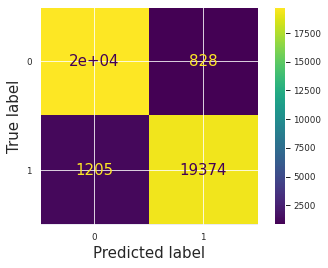

********************************************************************************
 


[0.95, 0.94, 0.96, 0.95]

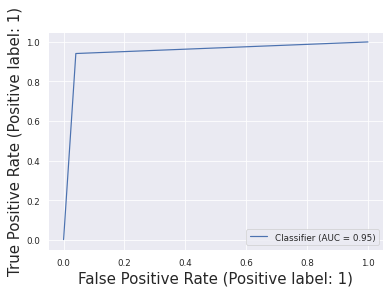

In [65]:
# Performance report on Train data
get_Report(y_train_tfidf_sm, y_pred_train_lr_sm)

In [66]:
# Predicting on Test 
y_pred_test_lr_sm = lr.predict(X_test_tfidf)

Logistic Regression accuracy 0.9246350364963504
              precision    recall  f1-score   support

           0       0.42      0.80      0.55       312
           1       0.99      0.93      0.96      5168

    accuracy                           0.92      5480
   macro avg       0.70      0.87      0.75      5480
weighted avg       0.95      0.92      0.94      5480

********************************************************************************

Accuracy :  0.9246350364963504
Recall:  0.9318885448916409
Precision:  0.9874923108468321
F1 score:  0.9588850174216029
********************************************************************************



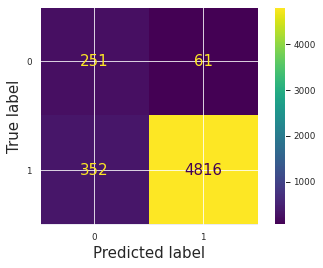

********************************************************************************
 


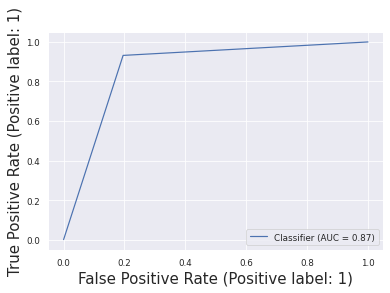

In [67]:
# Performance report on Test data with SMOTE
print("Logistic Regression accuracy", accuracy_score(y_test_tfidf, y_pred_test_lr_sm))
lr_test_perf_sm = get_Report(y_test_tfidf, y_pred_test_lr_sm)

In [68]:
df_compare_metrics['LR with smote'] = lr_test_perf_sm
df_compare_metrics

,Metrics,LR w/o smote,LR with smote
0,Accuracy,0.97,0.92
1,Recall,1.00,0.93
2,Precision,0.97,0.99
3,F1 Score,0.98,0.96


In [69]:
# Saving the model
filename = "logistic_reg_model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(lr, file)

In [70]:
# Load from file
with open(filename, 'rb') as file:
    pickled_model_lr = pickle.load(file)

### 2. Random Forest

**Using GridsearchCV to find the best estimator**

In [71]:
params = {
    'max_features': [10, 20],
    'max_depth': [10, 20],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [200],
    'n_estimators': [100, 200],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rf,
                          param_grid = params,
                          cv = 4,
                          scoring = 'precision',
                          n_jobs = -1,
                          verbose = 1)

In [72]:
%time
grid_search.fit(X_train_tfidf_sm, y_train_tfidf_sm)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
Fitting 4 folds for each of 16 candidates, totalling 64 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'max_features': [10, 20],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [200],
                         'n_estimators': [100, 200]},
             scoring='precision', verbose=1)

In [73]:
print('Best Precision Score', grid_search.best_score_)
print('Best Estimator', grid_search.best_estimator_)
print('Best Params', grid_search.best_params_)

Best Precision Score 0.8826734803743965
Best Estimator RandomForestClassifier(max_depth=20, max_features=20, min_samples_leaf=50,
                       min_samples_split=200, random_state=42)
Best Params {'max_depth': 20, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 200, 'n_estimators': 100}


In [74]:
# Initializing for best estimator
rfc = RandomForestClassifier(
    max_depth=20,
    max_features=20,
    min_samples_leaf=50,
    min_samples_split=200,
    n_estimators = 100,
    random_state=42,
    bootstrap = True,
    n_jobs = -1,
    verbose = 1)

In [75]:
# fitting on train data
%time
rfc.fit(X_train_tfidf_sm, y_train_tfidf_sm)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomForestClassifier(max_depth=20, max_features=20, min_samples_leaf=50,
                       min_samples_split=200, n_jobs=-1, random_state=42,
                       verbose=1)

In [76]:
# predicting on train data
y_pred_train_rfc_sm = rfc.predict(X_train_tfidf_sm)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.4s finished


Random Forest Classifier accuracy 0.8988289032508868
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     20579
           1       0.89      0.91      0.90     20579

    accuracy                           0.90     41158
   macro avg       0.90      0.90      0.90     41158
weighted avg       0.90      0.90      0.90     41158

********************************************************************************

Accuracy :  0.8988289032508868
Recall:  0.9107342436464357
Precision:  0.8895533722530732
F1 score:  0.9000192086054553
********************************************************************************



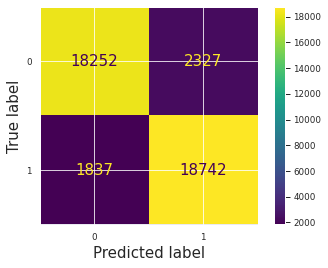

********************************************************************************
 


[0.9, 0.91, 0.89, 0.9]

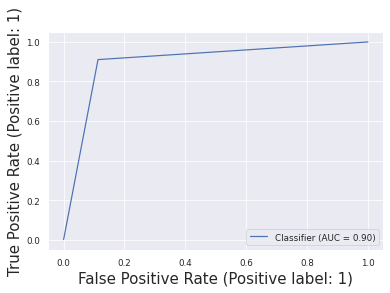

In [77]:
# generating Performance report on Train Data with SMOTE
print("Random Forest Classifier accuracy", accuracy_score(y_train_tfidf_sm, y_pred_train_rfc_sm))
get_Report(y_train_tfidf_sm, y_pred_train_rfc_sm)

In [78]:
# prediction on test data
y_pred_test_rfc_sm = rfc.predict(X_test_tfidf)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           0       0.34      0.72      0.46       312
           1       0.98      0.91      0.95      5168

    accuracy                           0.90      5480
   macro avg       0.66      0.82      0.70      5480
weighted avg       0.95      0.90      0.92      5480

********************************************************************************

Accuracy :  0.9032846715328468
Recall:  0.9140866873065016
Precision:  0.9821205821205822
F1 score:  0.9468831429144118
********************************************************************************



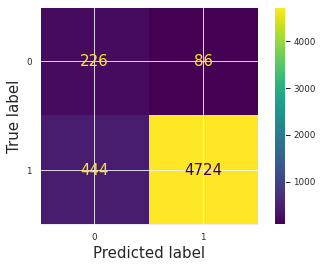

********************************************************************************
 


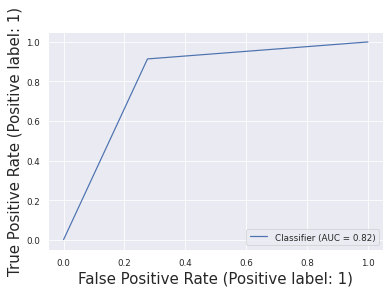

In [79]:
# generating Performance report on Test Data with SMOTE
rf_test_perf_sm = get_Report(y_test_tfidf, y_pred_test_rfc_sm)

In [80]:
df_compare_metrics['RF Tuned'] = rf_test_perf_sm
df_compare_metrics

,Metrics,LR w/o smote,LR with smote,RF Tuned
0,Accuracy,0.97,0.92,0.90
1,Recall,1.00,0.93,0.91
2,Precision,0.97,0.99,0.98
3,F1 Score,0.98,0.96,0.95


In [81]:
# Saving Random Forest model
filename = "random_forest_model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(rfc, file)

### 3. Naive Bayes

In [82]:
nb = MultinomialNB()

In [83]:
%time
nb.fit(X_train_tfidf_sm, y_train_tfidf_sm)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


MultinomialNB()

In [84]:
# predicting on train data
predict_train_nb_sm = nb.predict(X_train_tfidf_sm)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     20579
           1       0.93      0.86      0.89     20579

    accuracy                           0.90     41158
   macro avg       0.90      0.90      0.90     41158
weighted avg       0.90      0.90      0.90     41158

********************************************************************************

Accuracy :  0.8956703435541086
Recall:  0.8601972884979834
Precision:  0.9258852450441969
F1 score:  0.891833341730062
********************************************************************************



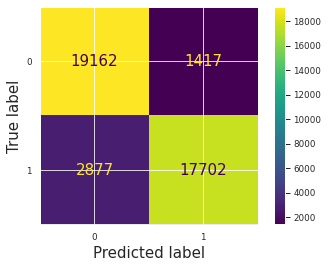

********************************************************************************
 


[0.9, 0.86, 0.93, 0.89]

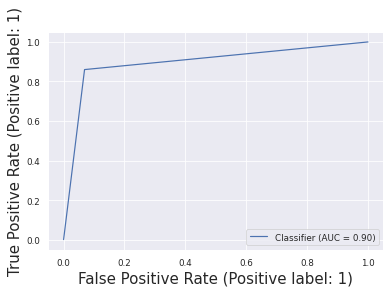

In [85]:
# generating Performance report on Train Data with SMOTE
get_Report(y_train_tfidf_sm, predict_train_nb_sm)

In [86]:
# predicting on test data
predict_test_nb_sm = nb.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.28      0.88      0.42       312
           1       0.99      0.86      0.92      5168

    accuracy                           0.86      5480
   macro avg       0.63      0.87      0.67      5480
weighted avg       0.95      0.86      0.89      5480

********************************************************************************

Accuracy :  0.8616788321167883
Recall:  0.8606811145510835
Precision:  0.9915292019616585
F1 score:  0.9214833229749325
********************************************************************************



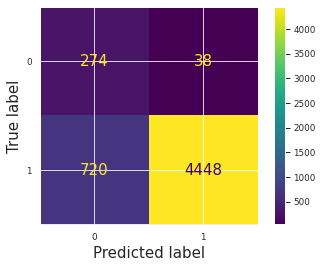

********************************************************************************
 


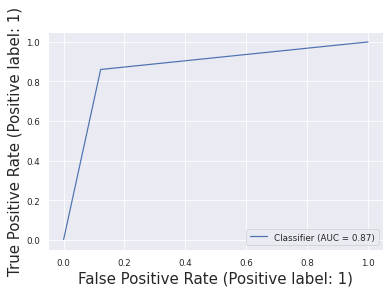

In [87]:
# generating Performance report on Test Data with SMOTE
nb_test_perf_sm = get_Report(y_test_tfidf, predict_test_nb_sm)

In [88]:
df_compare_metrics['Naive Bayes'] = nb_test_perf_sm
df_compare_metrics

,Metrics,LR w/o smote,LR with smote,RF Tuned,Naive Bayes
0,Accuracy,0.97,0.92,0.90,0.86
1,Recall,1.00,0.93,0.91,0.86
2,Precision,0.97,0.99,0.98,0.99
3,F1 Score,0.98,0.96,0.95,0.92


In [89]:
# Saving Naive Bayes model
filename = "naive_Bayes_model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(nb, file)

### 4. XGBoost

In [90]:
xg = xgb.XGBClassifier(random_state=42)

In [91]:
%time
xg.fit(X_train_tfidf_sm, y_train_tfidf_sm)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


XGBClassifier(random_state=42)

In [92]:
# predicting on train data
predict_train_xg_sm = xg.predict(X_train_tfidf_sm)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     20579
           1       0.91      0.94      0.92     20579

    accuracy                           0.92     41158
   macro avg       0.92      0.92      0.92     41158
weighted avg       0.92      0.92      0.92     41158

********************************************************************************

Accuracy :  0.9213518635502211
Recall:  0.9355653821857233
Precision:  0.9097051597051597
F1 score:  0.922454064154469
********************************************************************************



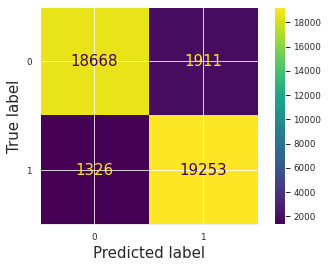

********************************************************************************
 


[0.92, 0.94, 0.91, 0.92]

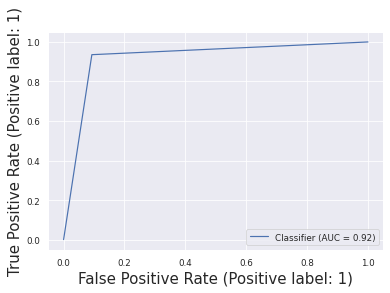

In [93]:
# generating Performance report on Train Data with SMOTE
get_Report(y_train_tfidf_sm, predict_train_xg_sm)

In [94]:
# predicting on test data
predict_test_xg_sm = xg.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.41      0.69      0.52       312
           1       0.98      0.94      0.96      5168

    accuracy                           0.93      5480
   macro avg       0.70      0.82      0.74      5480
weighted avg       0.95      0.93      0.94      5480

********************************************************************************

Accuracy :  0.9266423357664234
Recall:  0.940982972136223
Precision:  0.9804435483870968
F1 score:  0.9603080568720379
********************************************************************************



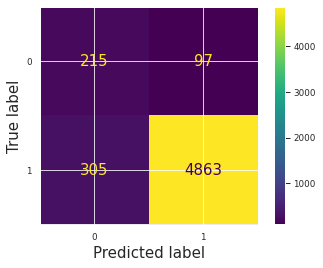

********************************************************************************
 


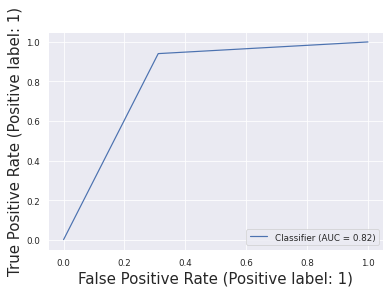

In [95]:
# generating Performance report on Test Data with SMOTE
xg_test_perf_sm = get_Report(y_test_tfidf, predict_test_xg_sm)

In [96]:
df_compare_metrics['XGB'] = xg_test_perf_sm
df_compare_metrics

,Metrics,LR w/o smote,LR with smote,RF Tuned,Naive Bayes,XGB
0,Accuracy,0.97,0.92,0.90,0.86,0.93
1,Recall,1.00,0.93,0.91,0.86,0.94
2,Precision,0.97,0.99,0.98,0.99,0.98
3,F1 Score,0.98,0.96,0.95,0.92,0.96


### 5. XGBoost Tuned

In [97]:
xg_grid = {"learning_rate": [0.30, 0.45],
           "max_depth": [5, 10]
           }
     

In [98]:
xg_hpt = GridSearchCV(XGBClassifier(random_state=42),
                                param_grid=xg_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1,
                                scoring='f1')

# Fit random hyperparameter search model
xg_hpt.fit(X_train_tfidf_sm, y_train_tfidf_sm)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=XGBClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.45], 'max_depth': [5, 10]},
             scoring='f1', verbose=True)

In [99]:
xg_hpt.best_params_

{'learning_rate': 0.45, 'max_depth': 10}

In [100]:
# Initializing for best estimator
xg_hpt = XGBClassifier(
    max_depth=10,
    learning_rate=0.45,
    random_state=42,
    bootstrap = True,
    n_jobs = -1,
    verbose = 1)

In [101]:
# fitting on train data
%time
xg_hpt.fit(X_train_tfidf_sm, y_train_tfidf_sm)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


XGBClassifier(bootstrap=True, learning_rate=0.45, max_depth=10, n_jobs=-1,
              random_state=42, verbose=1)

In [102]:
# predicting on train data
predict_train_xg_hpt_sm = xg_hpt.predict(X_train_tfidf_sm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20579
           1       1.00      1.00      1.00     20579

    accuracy                           1.00     41158
   macro avg       1.00      1.00      1.00     41158
weighted avg       1.00      1.00      1.00     41158

********************************************************************************

Accuracy :  0.997570338694786
Recall:  0.9987365761212887
Precision:  0.996412469093906
F1 score:  0.9975731689559773
********************************************************************************



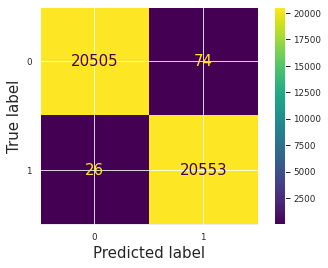

********************************************************************************
 


[1.0, 1.0, 1.0, 1.0]

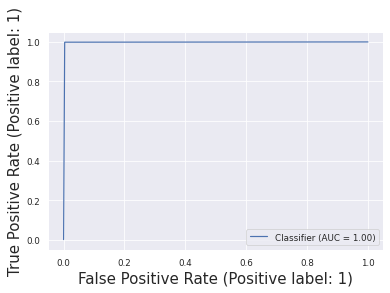

In [103]:
# generating Performance report on Train Data with SMOTE
get_Report(y_train_tfidf_sm, predict_train_xg_hpt_sm)

In [104]:
# predicting on test data
predict_test_xg_hpt_sm = xg_hpt.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       312
           1       0.98      0.98      0.98      5168

    accuracy                           0.96      5480
   macro avg       0.82      0.80      0.81      5480
weighted avg       0.96      0.96      0.96      5480

********************************************************************************

Accuracy :  0.9600364963503649
Recall:  0.9804566563467493
Precision:  0.9772420443587271
F1 score:  0.9788467110982323
********************************************************************************



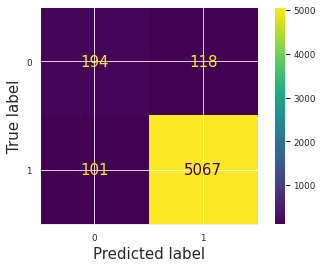

********************************************************************************
 


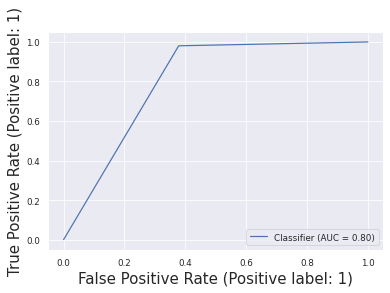

In [105]:
# generating Performance report on Test Data with SMOTE
xg_hpt_test_perf_sm = get_Report(y_test_tfidf, predict_test_xg_hpt_sm)

In [106]:
df_compare_metrics['XGB_Tuned'] = xg_hpt_test_perf_sm
df_compare_metrics

,Metrics,LR w/o smote,LR with smote,RF Tuned,Naive Bayes,XGB,XGB_Tuned
0,Accuracy,0.97,0.92,0.90,0.86,0.93,0.96
1,Recall,1.00,0.93,0.91,0.86,0.94,0.98
2,Precision,0.97,0.99,0.98,0.99,0.98,0.98
3,F1 Score,0.98,0.96,0.95,0.92,0.96,0.98


In [107]:
# Saving XGBoost Tuned model
filename = "XGBoost_model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(xg_hpt, file)

**OBSERVATION:**
- Based on the above table, we saw that **Logistic Regression & XGBoost** Tuned have performed the best
- The metric of importance here is precision and F1 Score.
- The AUC for LR and XGB Tuned are 0.87 and 0.80 resp.
- Based on above observation and simplicity of model, we will choose **Logistic Regression** as our final model for prediction purpose

Note: We will pick the LR model on smote data as there was class imbalance 

# Recommendation System

### USER Based Collaborative Filtering

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27396 entries, 0 to 27395
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    27396 non-null  object
 1   brand                 27396 non-null  object
 2   categories            27396 non-null  object
 3   manufacturer          27396 non-null  object
 4   name                  27396 non-null  object
 5   reviews_date          27396 non-null  object
 6   reviews_didPurchase   27396 non-null  object
 7   reviews_doRecommend   27396 non-null  object
 8   reviews_rating        27396 non-null  int64 
 9   reviews_userCity      27396 non-null  object
 10  reviews_userProvince  27396 non-null  object
 11  reviews_username      27396 non-null  object
 12  user_sentiment        27396 non-null  object
 13  reviews_title_text    27396 non-null  object
 14  sentiment_true        27396 non-null  object
 15  clean_review          27396 non-null

In [109]:
# creating dataframe specifically for recommendation engine
df_recom = df[["id", "name", "reviews_rating", "reviews_username"]]
df_recom.head()

,id,name,reviews_rating,reviews_username
0,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,rebecca
1,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,walker557
2,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,samantha
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,raeanne
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,kimmie


In [110]:
# train-test split as 80-20%
train, test = train_test_split(df_recom, test_size = 0.2, random_state = 42)

In [111]:
print(train.shape)
print(test.shape)

(21916, 4)
(5480, 4)


In [112]:
# creating pivot table with username as rows and product ids as columns 
df_pivot = train.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
).fillna(0)

In [113]:
print(df_pivot.shape)

(19045, 205)


In [114]:
df_pivot.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe41TqilAPnD_xQH3d,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe5ttZLJeJML43x4yO,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7sl91cnluZ0-aI1Y,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf-GsfLJeJML43GxG4,AVpf-lMV1cnluZ0-ub0_,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0kZFilAPnD_xi5QZ,AVpf0pfrilAPnD_xi6s_,AVpf0thK1cnluZ0-r8vR,AVpf1ryk1cnluZ0-sONd,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5ZcH1cnluZ0-tL9V,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,AVpf63aJLJeJML43F__Q,AVpf7I3i1cnluZ0-tnL6,AVpf7LysilAPnD_xkm9G,AVpf7fFbilAPnD_xkrmW,AVpf8AoBilAPnD_xkzJ2,AVpf99c6LJeJML43Gu3K,AVpf9UGp1cnluZ0-uITX,AVpf9_3MLJeJML43GvdB,AVpfAgSp1cnluZ0-b2-K,AVpfAkX91cnluZ0-b4d8,AVpfBO2vLJeJML430mGh,AVpfBSJgilAPnD_xTLf3,AVpfBU2S1cnluZ0-cJsO,AVpfBeN6LJeJML430rrn,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfBuqY1cnluZ0-cTBI,AVpfBwE4ilAPnD_xTWO1,AVpfC3KoLJeJML431KRR,AVpfCi3kilAPnD_xTn3k,AVpfCjEEilAPnD_xTn75,AVpfCuzrilAPnD_xTroT,AVpfCvKt1cnluZ0-cpI2,AVpfCy9b1cnluZ0-cqWS,AVpfD9xTLJeJML431ig2,...,AVpfEqFbilAPnD_xUV28,AVpfEqruilAPnD_xUWDr,AVpfErGsLJeJML431yRX,AVpfFGqP1cnluZ0-ddjG,AVpfFs_1ilAPnD_xUtRm,AVpfFymYilAPnD_xUvMh,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfHI2filAPnD_xVL7R,AVpfHZMxLJeJML432tfs,AVpfIGFeLJeJML4328YR,AVpfIN84LJeJML432_D9,AVpfIvbgLJeJML433Kph,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKOYiilAPnD_xWOFw,AVpfKa3uilAPnD_xWSGx,AVpfKb8k1cnluZ0-fQdA,AVpfKhuv1cnluZ0-fSVr,AVpfL-z9ilAPnD_xWzE_,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNVsj1cnluZ0-gNQN,AVpfNWbPilAPnD_xXPR7,AVpfNfEMLJeJML434uf-,AVpfO5u71cnluZ0-guiN,AVpfOIrkilAPnD_xXgDG,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfPKzxLJeJML435SYL,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPjqKLJeJML435aZR,AVpfPkrkilAPnD_xX-L9,AVpfPnrU1cnluZ0-g9rL,AVpfPx6V1cnluZ0-hA5y,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRkzN1cnluZ0-hmnu,AVpfRoqcLJeJML436FqG,AVpfSFDo1cnluZ0-hwjT,AVpfTVkcilAPnD_xZLts,AVpfUCiPilAPnD_xZai4,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfUQZjilAPnD_xZfOU,AVpfVMhR1cnluZ0-ixY8,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfa1joLJeJML4385hb,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfbpzd1cnluZ0-kqJV,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfddjcLJeJML439loo,AVpfe3On1cnluZ0-lgn5,AVpfgvkJLJeJML43-g1y,AVpfhpNkilAPnD_xdUZz,AVpfi79RLJeJML43_Jo0,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVp

In [115]:
# creating train dummy
dummy_train = train.copy()

In [116]:
# marking not rated products as 1 for prediction
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x : 0 if x >= 1 else 1)

In [117]:
# creating pivot table for dummy_train
dummy_train = dummy_train.pivot_table(index = 'reviews_username', columns = 'id', values = 'reviews_rating').fillna(1)

In [118]:
dummy_train

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe41TqilAPnD_xQH3d,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe5ttZLJeJML43x4yO,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7sl91cnluZ0-aI1Y,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf-GsfLJeJML43GxG4,AVpf-lMV1cnluZ0-ub0_,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0kZFilAPnD_xi5QZ,AVpf0pfrilAPnD_xi6s_,AVpf0thK1cnluZ0-r8vR,AVpf1ryk1cnluZ0-sONd,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5ZcH1cnluZ0-tL9V,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,AVpf63aJLJeJML43F__Q,AVpf7I3i1cnluZ0-tnL6,AVpf7LysilAPnD_xkm9G,AVpf7fFbilAPnD_xkrmW,AVpf8AoBilAPnD_xkzJ2,AVpf99c6LJeJML43Gu3K,AVpf9UGp1cnluZ0-uITX,AVpf9_3MLJeJML43GvdB,AVpfAgSp1cnluZ0-b2-K,AVpfAkX91cnluZ0-b4d8,AVpfBO2vLJeJML430mGh,AVpfBSJgilAPnD_xTLf3,AVpfBU2S1cnluZ0-cJsO,AVpfBeN6LJeJML430rrn,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfBuqY1cnluZ0-cTBI,AVpfBwE4ilAPnD_xTWO1,AVpfC3KoLJeJML431KRR,AVpfCi3kilAPnD_xTn3k,AVpfCjEEilAPnD_xTn75,AVpfCuzrilAPnD_xTroT,AVpfCvKt1cnluZ0-cpI2,AVpfCy9b1cnluZ0-cqWS,AVpfD9xTLJeJML431ig2,...,AVpfEqFbilAPnD_xUV28,AVpfEqruilAPnD_xUWDr,AVpfErGsLJeJML431yRX,AVpfFGqP1cnluZ0-ddjG,AVpfFs_1ilAPnD_xUtRm,AVpfFymYilAPnD_xUvMh,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfHI2filAPnD_xVL7R,AVpfHZMxLJeJML432tfs,AVpfIGFeLJeJML4328YR,AVpfIN84LJeJML432_D9,AVpfIvbgLJeJML433Kph,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKOYiilAPnD_xWOFw,AVpfKa3uilAPnD_xWSGx,AVpfKb8k1cnluZ0-fQdA,AVpfKhuv1cnluZ0-fSVr,AVpfL-z9ilAPnD_xWzE_,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNVsj1cnluZ0-gNQN,AVpfNWbPilAPnD_xXPR7,AVpfNfEMLJeJML434uf-,AVpfO5u71cnluZ0-guiN,AVpfOIrkilAPnD_xXgDG,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfPKzxLJeJML435SYL,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPjqKLJeJML435aZR,AVpfPkrkilAPnD_xX-L9,AVpfPnrU1cnluZ0-g9rL,AVpfPx6V1cnluZ0-hA5y,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRkzN1cnluZ0-hmnu,AVpfRoqcLJeJML436FqG,AVpfSFDo1cnluZ0-hwjT,AVpfTVkcilAPnD_xZLts,AVpfUCiPilAPnD_xZai4,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfUQZjilAPnD_xZfOU,AVpfVMhR1cnluZ0-ixY8,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfa1joLJeJML4385hb,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfbpzd1cnluZ0-kqJV,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfddjcLJeJML439loo,AVpfe3On1cnluZ0-lgn5,AVpfgvkJLJeJML43-g1y,AVpfhpNkilAPnD_xdUZz,AVpfi79RLJeJML43_Jo0,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVp

**Cosine Similarity**

In [119]:
from sklearn.metrics.pairwise import pairwise_distances

# creating user-similarity matrix using pairwise_distances func
user_correlation = 1 - pairwise_distances(df_pivot, metric = 'cosine')
# filling null values with zero
user_correlation[np.isnan(user_correlation)] = 0
user_correlation

array([[1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.       , ..., 0.       , 0.9486833,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ],
       [0.       , 0.9486833, 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ]])

In [120]:
user_correlation.shape

(19045, 19045)

**User - User similarity prediction score**

In [121]:
# filtering out negative correlation to zero
user_correlation[user_correlation < 0] = 0
user_correlation

array([[1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.       , ..., 0.       , 0.9486833,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ],
       [0.       , 0.9486833, 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ]])

In [122]:
# predicting user ratings
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[ 0.        ,  1.55342442,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.20913332, 16.93814035,  0.        , ...,  0.82874193,
         1.88600314,  2.45861264],
       [ 6.24931698, 26.04286174,  0.        , ...,  0.        ,
         3.14647242,  0.        ],
       ...,
       [ 0.47673129, 11.69085559,  0.        , ...,  2.09656967,
         3.53553391,  0.        ],
       [ 0.        , 13.20975907,  0.        , ...,  0.        ,
         1.56949095,  2.15967106],
       [ 0.47673129, 11.69085559,  0.        , ...,  2.09656967,
         3.53553391,  0.        ]])

In [123]:
user_predicted_ratings.shape

(19045, 205)

We are only interested for rating products that are not yet rated by user.So, already rated one will be marked as zero

In [124]:
user_rating = np.multiply(user_predicted_ratings, dummy_train)
user_rating

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe41TqilAPnD_xQH3d,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe5ttZLJeJML43x4yO,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7sl91cnluZ0-aI1Y,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf-GsfLJeJML43GxG4,AVpf-lMV1cnluZ0-ub0_,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0kZFilAPnD_xi5QZ,AVpf0pfrilAPnD_xi6s_,AVpf0thK1cnluZ0-r8vR,AVpf1ryk1cnluZ0-sONd,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5ZcH1cnluZ0-tL9V,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,AVpf63aJLJeJML43F__Q,AVpf7I3i1cnluZ0-tnL6,AVpf7LysilAPnD_xkm9G,AVpf7fFbilAPnD_xkrmW,AVpf8AoBilAPnD_xkzJ2,AVpf99c6LJeJML43Gu3K,AVpf9UGp1cnluZ0-uITX,AVpf9_3MLJeJML43GvdB,AVpfAgSp1cnluZ0-b2-K,AVpfAkX91cnluZ0-b4d8,AVpfBO2vLJeJML430mGh,AVpfBSJgilAPnD_xTLf3,AVpfBU2S1cnluZ0-cJsO,AVpfBeN6LJeJML430rrn,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfBuqY1cnluZ0-cTBI,AVpfBwE4ilAPnD_xTWO1,AVpfC3KoLJeJML431KRR,AVpfCi3kilAPnD_xTn3k,AVpfCjEEilAPnD_xTn75,AVpfCuzrilAPnD_xTroT,AVpfCvKt1cnluZ0-cpI2,AVpfCy9b1cnluZ0-cqWS,AVpfD9xTLJeJML431ig2,...,AVpfEqFbilAPnD_xUV28,AVpfEqruilAPnD_xUWDr,AVpfErGsLJeJML431yRX,AVpfFGqP1cnluZ0-ddjG,AVpfFs_1ilAPnD_xUtRm,AVpfFymYilAPnD_xUvMh,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfHI2filAPnD_xVL7R,AVpfHZMxLJeJML432tfs,AVpfIGFeLJeJML4328YR,AVpfIN84LJeJML432_D9,AVpfIvbgLJeJML433Kph,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKOYiilAPnD_xWOFw,AVpfKa3uilAPnD_xWSGx,AVpfKb8k1cnluZ0-fQdA,AVpfKhuv1cnluZ0-fSVr,AVpfL-z9ilAPnD_xWzE_,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNVsj1cnluZ0-gNQN,AVpfNWbPilAPnD_xXPR7,AVpfNfEMLJeJML434uf-,AVpfO5u71cnluZ0-guiN,AVpfOIrkilAPnD_xXgDG,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfPKzxLJeJML435SYL,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPjqKLJeJML435aZR,AVpfPkrkilAPnD_xX-L9,AVpfPnrU1cnluZ0-g9rL,AVpfPx6V1cnluZ0-hA5y,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRkzN1cnluZ0-hmnu,AVpfRoqcLJeJML436FqG,AVpfSFDo1cnluZ0-hwjT,AVpfTVkcilAPnD_xZLts,AVpfUCiPilAPnD_xZai4,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfUQZjilAPnD_xZfOU,AVpfVMhR1cnluZ0-ixY8,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfa1joLJeJML4385hb,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfbpzd1cnluZ0-kqJV,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfddjcLJeJML439loo,AVpfe3On1cnluZ0-lgn5,AVpfgvkJLJeJML43-g1y,AVpfhpNkilAPnD_xdUZz,AVpfi79RLJeJML43_Jo0,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVp

In [125]:
# taking username as input
user_name = str(input('Enter username: '))
print(user_name)

Enter username: chris
chris


#### Top 5 recommendation for this user

In [126]:
pred_top_5 = user_rating.loc[user_name].sort_values(ascending = False)[0 : 5]

In [127]:
pred_top_5

id
AVpf3VOfilAPnD_xjpun    75.594181
AVpf2tw1ilAPnD_xjflC    56.995964
AVpfM_ytilAPnD_xXIJb    38.395098
AVpfJP1C1cnluZ0-e3Xy    37.766342
AVpf5olc1cnluZ0-tPrO    28.270440
Name: chris, dtype: float64

In [128]:
# mapping product id to it's name
mapped = df[['id', 'name']]
mapped = pd.DataFrame.drop_duplicates(mapped)
mapped

,id,name
0,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
25,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
30,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar
34,AV1h6Gu0glJLPUi8IjA_,"Johnson's Baby Bubble Bath and Wash, 15oz"
47,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream
...,...,...
26338,AVpfUQZjilAPnD_xZfOU,Bedtime Originals Pinkie Musical Mobile
26344,AVpfv4TlilAPnD_xhjNS,Various - Red Hot Blue:Tribute To Cole Porter ...
26346,AVpfVMhR1cnluZ0-ixY8,2017-2018 Brownline174 Duraflex 14-Month Plann...
26347,AVpfVPh3ilAPnD_xZzW9,Mrs. Meyer's Lemon Verbena Surface Scrub


In [129]:
# merging dataframes for getting names of the product
merged = pd.merge(pred_top_5, mapped, left_on = 'id', right_on = 'id', how = 'left')
merged

,id,chris,name
0,AVpf3VOfilAPnD_xjpun,75.594181,Clorox Disinfecting Wipes Value Pack Scented 1...
1,AVpf2tw1ilAPnD_xjflC,56.995964,Red (special Edition) (dvdvideo)
2,AVpfM_ytilAPnD_xXIJb,38.395098,Tostitos Bite Size Tortilla Chips
3,AVpfJP1C1cnluZ0-e3Xy,37.766342,Clorox Disinfecting Bathroom Cleaner
4,AVpf5olc1cnluZ0-tPrO,28.270440,Chester's Cheese Flavored Puffcorn Snacks


#### Top 20 recommendation for the same user

In [130]:
pred_top_20 = user_rating.loc[user_name].sort_values(ascending = False)[0 : 20]

In [131]:
# merging dataframes for getting names of the product
merged = pd.merge(pred_top_20, mapped, left_on = 'id', right_on = 'id', how = 'left')
merged

,id,chris,name
0,AVpf3VOfilAPnD_xjpun,75.594181,Clorox Disinfecting Wipes Value Pack Scented 1...
1,AVpf2tw1ilAPnD_xjflC,56.995964,Red (special Edition) (dvdvideo)
2,AVpfM_ytilAPnD_xXIJb,38.395098,Tostitos Bite Size Tortilla Chips
3,AVpfJP1C1cnluZ0-e3Xy,37.766342,Clorox Disinfecting Bathroom Cleaner
4,AVpf5olc1cnluZ0-tPrO,28.270440,Chester's Cheese Flavored Puffcorn Snacks
5,AVpf0thK1cnluZ0-r8vR,24.140313,100:Complete First Season (blu-Ray)
6,AVpe8gsILJeJML43y6Ed,16.623021,"Pendaflex174 Divide It Up File Folder, Multi S..."
7,AVpf63aJLJeJML43F__Q,15.499999,"Burt's Bees Lip Shimmer, Raisin"
8,AVpfBrUZilAPnD_xTUly,14.795559,"Coty Airspun Face Powder, Translucent Extra Co..."
9,AVpfD9xTLJeJML431ig2,14.392012,There's Something About Mary (dvd)


#### Evaluating User-User similarity based recommendation

In [132]:
# we are only interested in the username for which our model is trained
common = test[test.reviews_username.isin(train.reviews_username)]

In [133]:
common

,id,name,reviews_rating,reviews_username
6027,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,4,dee2
14474,AVpf4oLxLJeJML43FcxC,Avery174 Ready Index Contemporary Table Of Con...,5,higgy
1947,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),4,jimbo
14214,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,wizard
24033,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,5,laura
...,...,...,...,...
13802,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,robin47
23435,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,5,lizzie
2519,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,3,bestbuyfan
19984,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,5,queenelizabeth


In [134]:
# converting into user-product pivot table
common_user_pivot = common.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
)
common_user_pivot

id,AV1YGDqsGV-KLJ3adc-O,AV1YmDL9vKc47QAVgr7_,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe59io1cnluZ0-ZgDU,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6n2_LJeJML43yOgE,AVpe78stLJeJML43ytOY,AVpe7sl91cnluZ0-aI1Y,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe9W4D1cnluZ0-avf0,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0thK1cnluZ0-r8vR,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4oLxLJeJML43FcxC,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,AVpf63aJLJeJML43F__Q,AVpf7LysilAPnD_xkm9G,AVpf9_3MLJeJML43GvdB,AVpfAgSp1cnluZ0-b2-K,AVpfAkX91cnluZ0-b4d8,AVpfBU2S1cnluZ0-cJsO,AVpfBrUZilAPnD_xTUly,AVpfCuzrilAPnD_xTroT,AVpfD9xTLJeJML431ig2,AVpfEqruilAPnD_xUWDr,AVpfFymYilAPnD_xUvMh,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKOYiilAPnD_xWOFw,AVpfKb8k1cnluZ0-fQdA,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNWbPilAPnD_xXPR7,AVpfOIrkilAPnD_xXgDG,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfOrD0ilAPnD_xXrRj,AVpfPaoqLJeJML435Xk9,AVpfPnrU1cnluZ0-g9rL,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRoqcLJeJML436FqG,AVpfTVkcilAPnD_xZLts,AVpfUJu_ilAPnD_xZdDr,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfjHuw1cnluZ0-mvrX,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrTyiLJeJML43BrSI,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yorkielvr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [135]:
# creating user_correlation dataframe
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,18945,18946,18947,18948,18949,18950,18951,18952,18953,18954,18955,18956,18957,18958,18959,18960,18961,18962,18963,18964,18965,18966,18967,18968,18969,18970,18971,18972,18973,18974,18975,18976,18977,18978,18979,18980,18981,18982,18983,18984,18985,18986,18987,18988,18989,18990,18991,18992,18993,18994,18995,18996,18997,18998,18999,19000,19001,19002,19003,19004,19005,19006,19007,19008,19009,19010,19011,19012,19013,19014,19015,19016,19017,19018,19019,19020,19021,19022,19023,19024,19025,19026,19027,19028,19029,19030,19031,19032,19033,19034,19035,19036,19037,19038,19039,19040,19041,19042,19043,19044
0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.0,0.0,0.0,0.209427,0.0,0.0,0.948683,0.223607,0.0,0.0,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.948683,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.839570,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316228,0.0,0.0,0.948683,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.0
2,0.0,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.529813,0.0,0.0,0.000000,0.707107,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.514496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.624695,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.468521,0.000000,0.0,0.0,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.529813,0.0,0.0,0.000000,0.707107,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.514496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [136]:
user_correlation_df['reviews_username'] = df_pivot.index
user_correlation_df.set_index('reviews_username', inplace = True)
user_correlation_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,18945,18946,18947,18948,18949,18950,18951,18952,18953,18954,18955,18956,18957,18958,18959,18960,18961,18962,18963,18964,18965,18966,18967,18968,18969,18970,18971,18972,18973,18974,18975,18976,18977,18978,18979,18980,18981,18982,18983,18984,18985,18986,18987,18988,18989,18990,18991,18992,18993,18994,18995,18996,18997,18998,18999,19000,19001,19002,19003,19004,19005,19006,19007,19008,19009,19010,19011,19012,19013,19014,19015,19016,19017,19018,19019,19020,19021,19022,19023,19024,19025,19026,19027,19028,19029,19030,19031,19032,19033,19034,19035,19036,19037,19038,19039,19040,19041,19042,19043,19044
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
00sab00,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.0,0.0,0.0,0.209427,0.0,0.0,0.948683,0.223607,0.0,0.0,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.948683,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.839570,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316228,0.0,0.0,0.948683,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.0
01impala,0.0,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.529813,0.0,0.0,0.000000,0.707107,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.514496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.624695,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.468521,0.000000,0.0,0.0,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
02dakota,0.0,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.529813,0.0,0.0,0.0

In [137]:
# filtering user_correlation only for the users present in common
list_name = common.reviews_username.tolist()
user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df1 = user_correlation_df[user_correlation_df.index.isin(list_name)]
user_correlation_df1.shape

(1117, 19045)

In [138]:
user_correlation_df2 = user_correlation_df1.T[user_correlation_df1.T.index.isin(list_name)]

In [139]:
user_correlation_df3 = user_correlation_df2.T

In [140]:
user_correlation_df3.shape

(1117, 1117)

In [141]:
user_correlation_df3

,1234,1234567,143st,1943,1witch,50cal,a hutch,aaron,abbey,abcgator,ac94,acg1,acjuarez08,acv4217,adam,addmotherhood25,adma2,afwifey2003,ah78,ahjohnson1983,aimee,aj2012,ajackson75,akesler19,alarm,alena125,alix p,allen,ally1989,amanda,amazing,ambr1207,ambybambi0725,ammcam,amsey,amy00381,amy1,anabanana2112,andream82,andrew,andy,ang32,angc,angel,angel65481,angela,angie,angie0104,angie2,angie447,angiesmessykids,annalou75,anne,anthony,aphoung,april,arlandry,arno,arob,artfulhousewife,aryalynn,asaump,ash4,ashley,ashleyden,ashsmash,askk808,at527,auntie,auroradawn,awesomesunshine,azamy,babumsky,badgrl3616,baker,bams,barb,barbb,bargainhuntergmaoftwo,bargainshopper,baronesscountess,batmanny,bb902460,bbjj,bblack,bbshopper,becca,becky25,behair,bernie,beso,bestbuyfan,bestbuyshopper,beth74,bethm,bethp,beverly,bhiam,bigdaddy,bigdaddybuttah,...,suzzz,sweet_t18,sweetpea626,sweetpea8050,sweets,swimmer2005,swtdrmz,sxctysix,tabbicake,tami62,tammy27,tat2me82,tati2015,taylorm,taylorsmom12,tayy,tb10,tbbv,tdyork23,teckys4,teresa,terry,tfdc73,thatguy,thatoneguy,the boss,thegreatone,themcdermitts,themoviemaniac,thewowfactor,thirsty23,thomas,thumperthebunny,tiffy,timm,tina,tink0917,tinytom,tisha9878,tjzmom,tmoeb,tmouada,todd,tomi,tony,tony1,tooney38,topaz0502,tracelyn28,trav,trcvngrn,treese,treesmith,trina,trish,trisha,truth,turi,tw350z,twin,txmomof6,unicorn351,vanita80,veroo,vicki,victor,victoria harris,viewer,vikki,vivi37,vivian,vivienne,vkay,walker,wcgirl,weewee,wheezie,whythis,wildclay12,wimbly,wind,wizard,wolf,woottos,workingmomof1,worm,wowiezowie,xlivayy,xmom,yamel97,yayatex,yellow,yesseniaw22,yeya,yohnie1,yorkielvr,yummy,zach,zapman,zipper
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,1.000000,0.529813,0.0,0.272587,0.0,0.0,0.0,0.443033,0.0,0.0,0.374634,0.0,0.529813,0.0,0.305888,0.529813,0.000000,0.529813,0.0,0.529813,0.0,0.529813,0.529813,0.529813,0.529813,0.0,0.0,0.0,0.529813,0.374634,0.0,0.529813,0.0,0.0,0.529813,0.529813,0.662266,0.0,0.529813,0.529813,0.278762,0.529813,0.0,0.000000,0.0,0.413714,0.823754,0.529813,0.529813,0.0,0.374634,0.529813,0.611775,0.662266,0.529813,0.0,0.529813,0.529813,0.662266,0.529813,0.529813,0.0,0.374634,0.413714,0.529813,0.0,0.0,0.0,0.529813,0.529813,0.0,0.529813,0.0,0.0,0.374634,0.529813,0.0,0.0,0.529813,0.0,0.0,0.662266,0.0,0.529813,0.0,0.0,0.0,0.529813,0.0,0.0,0.529813,0.662266,0.0,0.374634,0.0,0.0,0.0,0.0,0.842927,0.0,...,0.529813,0.0,0.529813,0.529813,0.0,0.000000,0.529813,0.374634,0.529813,0.529813,0.529813,0.529813,0.529813,0.0,0.529813,0.529813,0.662266,0.0,0.0,0.0,0.264906,0.264906,0.529813,0.000000,0.529813,0.0,0.0,0.529813,0.529813,0.0,0.0,0.206537,0.0,0.374634,0.0,0.000000,0.529813,0.529813,0.529813,0.0,0.529813,0.0,0.00000,0.529813,0.442723,0.519524,0.374634,0.0,0.529813,0.0,0.0,0.0,0.529813,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.529813,0.0,0.0,0.0,0.206927,0.374634,0.0,0.206927,0.374634,0.529813,0.529813,0.0,0.529813,0.0,0.529813,0.529813,0.0,0.529813,0.0,0.0,0.529813,0.0,0.529813,0.529813,0.529813,0.0,0.529813,0.0,0.529813,0.0,0.529813,0.529813,0.0,0.529813,0.374634,0.529813,0.0,0.0,0.0,0.529813
1234567,0.529813,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.707107,0.0,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.780869,0.545545,1.000000,1.000000,0.0,0.707107,1.000000,0.577350,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.707107,0.780869,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.000000,0.0,0.707107,0.0,0.0,0.0,0.0,0.707107,0.0,...,1.000000,0.0,1.000000,1.000000,0.0,0.000000,1.000000,0.707107,

In [142]:
# filtering negative correlation as zero
user_correlation_df3[user_correlation_df3 < 0] = 0
common_users_pred_rating = np.dot(user_correlation_df3, common_user_pivot.fillna(0))
common_users_pred_rating

array([[ 4.20736101,  2.11925177,  0.        , ...,  0.82375447,
         1.32453236,  0.        ],
       [ 0.69337525,  4.        ,  0.        , ...,  0.54554473,
         2.5       ,  0.        ],
       [ 0.49029034,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  1.94037631,  0.        , ...,  0.        ,
         2.5       ,  0.        ],
       [26.08286748,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.82842712,  0.        ,  0.        , ...,  0.32732684,
         0.        ,  0.        ]])

In [143]:
# creating dummy_test to only get prediction where rating is available 
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x : 1 if x >= 1 else 0)
dummy_test = dummy_test.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
).fillna(0)

In [144]:
dummy_test

id,AV1YGDqsGV-KLJ3adc-O,AV1YmDL9vKc47QAVgr7_,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe59io1cnluZ0-ZgDU,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6n2_LJeJML43yOgE,AVpe78stLJeJML43ytOY,AVpe7sl91cnluZ0-aI1Y,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe9W4D1cnluZ0-avf0,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0thK1cnluZ0-r8vR,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4oLxLJeJML43FcxC,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,AVpf63aJLJeJML43F__Q,AVpf7LysilAPnD_xkm9G,AVpf9_3MLJeJML43GvdB,AVpfAgSp1cnluZ0-b2-K,AVpfAkX91cnluZ0-b4d8,AVpfBU2S1cnluZ0-cJsO,AVpfBrUZilAPnD_xTUly,AVpfCuzrilAPnD_xTroT,AVpfD9xTLJeJML431ig2,AVpfEqruilAPnD_xUWDr,AVpfFymYilAPnD_xUvMh,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKOYiilAPnD_xWOFw,AVpfKb8k1cnluZ0-fQdA,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNWbPilAPnD_xXPR7,AVpfOIrkilAPnD_xXgDG,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfOrD0ilAPnD_xXrRj,AVpfPaoqLJeJML435Xk9,AVpfPnrU1cnluZ0-g9rL,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRoqcLJeJML436FqG,AVpfTVkcilAPnD_xZLts,AVpfUJu_ilAPnD_xZdDr,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfjHuw1cnluZ0-mvrX,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrTyiLJeJML43BrSI,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yorkielvr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [145]:
common_users_pred_rating = np.multiply(common_users_pred_rating, dummy_test)
common_users_pred_rating

id,AV1YGDqsGV-KLJ3adc-O,AV1YmDL9vKc47QAVgr7_,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe59io1cnluZ0-ZgDU,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6n2_LJeJML43yOgE,AVpe78stLJeJML43ytOY,AVpe7sl91cnluZ0-aI1Y,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe9W4D1cnluZ0-avf0,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0thK1cnluZ0-r8vR,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4oLxLJeJML43FcxC,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,AVpf63aJLJeJML43F__Q,AVpf7LysilAPnD_xkm9G,AVpf9_3MLJeJML43GvdB,AVpfAgSp1cnluZ0-b2-K,AVpfAkX91cnluZ0-b4d8,AVpfBU2S1cnluZ0-cJsO,AVpfBrUZilAPnD_xTUly,AVpfCuzrilAPnD_xTroT,AVpfD9xTLJeJML431ig2,AVpfEqruilAPnD_xUWDr,AVpfFymYilAPnD_xUvMh,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKOYiilAPnD_xWOFw,AVpfKb8k1cnluZ0-fQdA,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNWbPilAPnD_xXPR7,AVpfOIrkilAPnD_xXgDG,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfOrD0ilAPnD_xXrRj,AVpfPaoqLJeJML435Xk9,AVpfPnrU1cnluZ0-g9rL,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRoqcLJeJML436FqG,AVpfTVkcilAPnD_xZLts,AVpfUJu_ilAPnD_xZdDr,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfjHuw1cnluZ0-mvrX,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrTyiLJeJML43BrSI,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.645201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,1191.040049,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,22.803185,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,48.879371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.60768,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [146]:
X = common_users_pred_rating.copy()
X = X[X > 0]

In [147]:
# normalising the rating to (1,5) range
scaler = MinMaxScaler(feature_range = (1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))
print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [ 5. nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [148]:
common_pivot = common.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
)

In [149]:
common_pivot

id,AV1YGDqsGV-KLJ3adc-O,AV1YmDL9vKc47QAVgr7_,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe59io1cnluZ0-ZgDU,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6n2_LJeJML43yOgE,AVpe78stLJeJML43ytOY,AVpe7sl91cnluZ0-aI1Y,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe9W4D1cnluZ0-avf0,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0thK1cnluZ0-r8vR,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4oLxLJeJML43FcxC,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,AVpf63aJLJeJML43F__Q,AVpf7LysilAPnD_xkm9G,AVpf9_3MLJeJML43GvdB,AVpfAgSp1cnluZ0-b2-K,AVpfAkX91cnluZ0-b4d8,AVpfBU2S1cnluZ0-cJsO,AVpfBrUZilAPnD_xTUly,AVpfCuzrilAPnD_xTroT,AVpfD9xTLJeJML431ig2,AVpfEqruilAPnD_xUWDr,AVpfFymYilAPnD_xUvMh,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKOYiilAPnD_xWOFw,AVpfKb8k1cnluZ0-fQdA,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNWbPilAPnD_xXPR7,AVpfOIrkilAPnD_xXgDG,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfOrD0ilAPnD_xXrRj,AVpfPaoqLJeJML435Xk9,AVpfPnrU1cnluZ0-g9rL,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRoqcLJeJML436FqG,AVpfTVkcilAPnD_xZLts,AVpfUJu_ilAPnD_xZdDr,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfjHuw1cnluZ0-mvrX,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrTyiLJeJML43BrSI,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yorkielvr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [150]:
# finding count of non-NaN value
count_non_nan = np.count_nonzero(~np.isnan(y))
count_non_nan

1243

In [151]:
# mean square error
mse = ((y - common_pivot) ** 2).mean()
mse

id
AV1YGDqsGV-KLJ3adc-O     2.18218
AV1YmDL9vKc47QAVgr7_     3.00000
AV1YneDPglJLPUi8IJyQ    16.00000
AV1YqAaMGV-KLJ3adiDj    16.00000
AV1Ys0kTvKc47QAVgx1C    16.00000
                          ...   
AVpfpM2yilAPnD_xfmDG    16.00000
AVpfr5cb1cnluZ0-pZFp    16.00000
AVpfrTyiLJeJML43BrSI     0.00000
AVpfthSailAPnD_xg3ON    16.00000
AVpftikC1cnluZ0-p31V     2.00000
Length: 84, dtype: float64

In [152]:
# root mean square error
rmse = (sum(mse)/count_non_nan) ** 0.5
rmse

0.7809067873412157

### ITEM Based Collaborative Filtering

In [153]:
df_pivot = train.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
).T

df_pivot

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,1.11E+24,1085,10ten,1143mom,11677j,1234,1234561,1234567,123cat123,123charlie,123numbers,123rs,123soccermom,123too,127726,12cass12,132457,13ld,13ram,13thfaerie,1421nikki,143st,148maine,1515,1616,170361eggs,1753,17roses,18612,1863philly,1943,1968bear,1970,1979edes,1992firebirdgirl,19bubba67,19granny,1boomer,1buzymom,1cadet,1chynna,1clean1,1cleaner,1cocoafan,1derpet1,1disappoint,1friendlycat,1gamer,1glenn,1gra,1gussy,1happymom,1healthytot,1hotmama,1jc1,1kindword,1movielover2,1nikki31t,1olaygal,1scooby1,1stgrade,1stlady,1sttimemama,1sungirl,1texasmom,1tomg,1wildbill2l,1witch,2011mom2b,2011pink2011,2013bestbuyer,2014bestbuys,2015mom,2016,2062351337,210tundra,2175046722,21honey,21please,232323,23jen,24hrstoneroses,2532674594,25happyshopper,2689,2827,295259,2athome,2bgreen,2big,2choclabs,2clean4me,...,yshan,ythelastman89,yucky111,yulkakapulka,yummy,yumyum,yunji,yvonne,z12345,z33pisces,z992,zabdelra,zach,zacharysaunt,zachizz,zacroxs,zaibo,zak08,zakkwylde29,zakkzakk,zamanda,zanay,zanzan73,zapman,zara0215,zara07,zarah,zburt5,zebras,zebrastrong,zee74,zeek09,zeeleader,zegan,zelyas,zenanuts,zer0zer0agent,zeramm,zero,zeroonec,zetamom,zfem2,zhio,zhynellebb,ziana,zibber23,zibby4,ziggy,zillafan,zillanator,zimmeyb,zina911,zink,zinnian,zipflip,zipp,zipper,zipperdoo,zippity,zippy,zitro,zittles,zkondrk,zman69,zmikez,zmom,zod10,zodness,zoe1988,zoeellasca,zoey,zoeyny,zombie,zombiedad80,zombiegirl22,zombiejess,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoomin76,zoso60,zout22389,zowie,zozo0o,zpalma,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [154]:
# item similarity matrix using pairwise_distances
item_correlation = 1 - pairwise_distances(df_pivot.fillna(0), metric = 'cosine')
item_correlation[np.isnan(item_correlation)] = 0

item_correlation

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.00535958,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.00535958, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [155]:
item_correlation.shape

(205, 205)

In [156]:
# filtering out negative correlation as zero
item_correlation[item_correlation < 0] = 0
item_correlation

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.00535958,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.00535958, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

#### Item Collaborative filtering based prediction

In [157]:
item_pred_rating = np.dot((df_pivot.fillna(0).T), item_correlation)
item_pred_rating

array([[0.        , 0.06288163, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01631001, 0.0742798 , 0.        , ..., 0.02119046, 0.01429435,
        0.12374621],
       [0.04553692, 0.04676252, 0.        , ..., 0.        , 0.007546  ,
        0.        ],
       ...,
       [0.0044747 , 0.02247974, 0.        , ..., 0.02325465, 0.00503639,
        0.        ],
       [0.        , 0.08752874, 0.        , ..., 0.        , 0.01892863,
        0.17273863],
       [0.00357976, 0.0179838 , 0.        , ..., 0.01860372, 0.00402911,
        0.        ]])

In [158]:
item_pred_rating.shape

(19045, 205)

In [159]:
dummy_train.shape

(19045, 205)

In [160]:
# We are only interested in the products rating not rated by user in train dataset
item_rating = np.multiply(item_pred_rating, dummy_train)
item_rating

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe41TqilAPnD_xQH3d,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe5ttZLJeJML43x4yO,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7sl91cnluZ0-aI1Y,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf-GsfLJeJML43GxG4,AVpf-lMV1cnluZ0-ub0_,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0kZFilAPnD_xi5QZ,AVpf0pfrilAPnD_xi6s_,AVpf0thK1cnluZ0-r8vR,AVpf1ryk1cnluZ0-sONd,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5ZcH1cnluZ0-tL9V,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,AVpf63aJLJeJML43F__Q,AVpf7I3i1cnluZ0-tnL6,AVpf7LysilAPnD_xkm9G,AVpf7fFbilAPnD_xkrmW,AVpf8AoBilAPnD_xkzJ2,AVpf99c6LJeJML43Gu3K,AVpf9UGp1cnluZ0-uITX,AVpf9_3MLJeJML43GvdB,AVpfAgSp1cnluZ0-b2-K,AVpfAkX91cnluZ0-b4d8,AVpfBO2vLJeJML430mGh,AVpfBSJgilAPnD_xTLf3,AVpfBU2S1cnluZ0-cJsO,AVpfBeN6LJeJML430rrn,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfBuqY1cnluZ0-cTBI,AVpfBwE4ilAPnD_xTWO1,AVpfC3KoLJeJML431KRR,AVpfCi3kilAPnD_xTn3k,AVpfCjEEilAPnD_xTn75,AVpfCuzrilAPnD_xTroT,AVpfCvKt1cnluZ0-cpI2,AVpfCy9b1cnluZ0-cqWS,AVpfD9xTLJeJML431ig2,...,AVpfEqFbilAPnD_xUV28,AVpfEqruilAPnD_xUWDr,AVpfErGsLJeJML431yRX,AVpfFGqP1cnluZ0-ddjG,AVpfFs_1ilAPnD_xUtRm,AVpfFymYilAPnD_xUvMh,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfHI2filAPnD_xVL7R,AVpfHZMxLJeJML432tfs,AVpfIGFeLJeJML4328YR,AVpfIN84LJeJML432_D9,AVpfIvbgLJeJML433Kph,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKOYiilAPnD_xWOFw,AVpfKa3uilAPnD_xWSGx,AVpfKb8k1cnluZ0-fQdA,AVpfKhuv1cnluZ0-fSVr,AVpfL-z9ilAPnD_xWzE_,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNVsj1cnluZ0-gNQN,AVpfNWbPilAPnD_xXPR7,AVpfNfEMLJeJML434uf-,AVpfO5u71cnluZ0-guiN,AVpfOIrkilAPnD_xXgDG,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfPKzxLJeJML435SYL,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPjqKLJeJML435aZR,AVpfPkrkilAPnD_xX-L9,AVpfPnrU1cnluZ0-g9rL,AVpfPx6V1cnluZ0-hA5y,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRYbSilAPnD_xYkD4,AVpfRkzN1cnluZ0-hmnu,AVpfRoqcLJeJML436FqG,AVpfSFDo1cnluZ0-hwjT,AVpfTVkcilAPnD_xZLts,AVpfUCiPilAPnD_xZai4,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfUQZjilAPnD_xZfOU,AVpfVMhR1cnluZ0-ixY8,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfa1joLJeJML4385hb,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfbpzd1cnluZ0-kqJV,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfddjcLJeJML439loo,AVpfe3On1cnluZ0-lgn5,AVpfgvkJLJeJML43-g1y,AVpfhpNkilAPnD_xdUZz,AVpfi79RLJeJML43_Jo0,AVpfiRY_LJeJML43-8p9,AVpfiUrfLJeJML43-9nY,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfkIiYilAPnD_xeEjr,AVpfkQkcLJeJML43_kEC,AVpfkak01cnluZ0-nJj6,AVpfksililAPnD_xePx_,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVp

#### Top 5 recommendation

In [161]:
# taking userID
user_input = str(input('Enter username: '))
print(user_input)

Enter username: chris
chris


In [162]:
pred_top_5 = item_rating.loc[user_input].sort_values(ascending = False)[0 : 5]
pred_top_5

id
AVpf4WWN1cnluZ0-s7Wj    1.036967
AVpfv4TlilAPnD_xhjNS    0.875908
AVpfM_ytilAPnD_xXIJb    0.797351
AVpf5olc1cnluZ0-tPrO    0.737666
AVpfEqruilAPnD_xUWDr    0.576457
Name: chris, dtype: float64

In [163]:
# merging the mapped df with pred to get the name of the recommended products
merged = pd.merge(pred_top_5, mapped, left_on = 'id', right_on = 'id', how = 'left')
merged

,id,chris,name
0,AVpf4WWN1cnluZ0-s7Wj,1.036967,Chips Deluxe Soft 'n Chewy Cookies
1,AVpfv4TlilAPnD_xhjNS,0.875908,Various - Red Hot Blue:Tribute To Cole Porter ...
2,AVpfM_ytilAPnD_xXIJb,0.797351,Tostitos Bite Size Tortilla Chips
3,AVpf5olc1cnluZ0-tPrO,0.737666,Chester's Cheese Flavored Puffcorn Snacks
4,AVpfEqruilAPnD_xUWDr,0.576457,"Newman's Own Balsamic Vinaigrette, 16.0oz"


#### Top 20 recommendation

In [164]:
pred_top_20 = item_rating.loc[user_input].sort_values(ascending = False)[0 : 20]
pred_top_20

id
AVpf4WWN1cnluZ0-s7Wj    1.036967
AVpfv4TlilAPnD_xhjNS    0.875908
AVpfM_ytilAPnD_xXIJb    0.797351
AVpf5olc1cnluZ0-tPrO    0.737666
AVpfEqruilAPnD_xUWDr    0.576457
AVpf2tw1ilAPnD_xjflC    0.556525
AVpfov9TLJeJML43A7B0    0.545881
AVpf0thK1cnluZ0-r8vR    0.527633
AVpfi79RLJeJML43_Jo0    0.524676
AVpe6FfKilAPnD_xQmHi    0.437969
AVpf7I3i1cnluZ0-tnL6    0.404364
AVpfMpZ51cnluZ0-f_L9    0.381206
AVpfUN2nilAPnD_xZeY3    0.378600
AVpfpM2yilAPnD_xfmDG    0.376183
AVpfrFDZLJeJML43Bmv0    0.359381
AV1Ys0kTvKc47QAVgx1C    0.359222
AVpfoSS51cnluZ0-oVH9    0.348105
AVpe8gsILJeJML43y6Ed    0.342780
AVpfm8yiLJeJML43AYyu    0.339315
AVpfkQkcLJeJML43_kEC    0.322916
Name: chris, dtype: float64

In [165]:
# merging the mapped df with pred to get the name of the recommended products
merged = pd.merge(pred_top_20, mapped, left_on = 'id', right_on = 'id', how = 'left')
merged

,id,chris,name
0,AVpf4WWN1cnluZ0-s7Wj,1.036967,Chips Deluxe Soft 'n Chewy Cookies
1,AVpfv4TlilAPnD_xhjNS,0.875908,Various - Red Hot Blue:Tribute To Cole Porter ...
2,AVpfM_ytilAPnD_xXIJb,0.797351,Tostitos Bite Size Tortilla Chips
3,AVpf5olc1cnluZ0-tPrO,0.737666,Chester's Cheese Flavored Puffcorn Snacks
4,AVpfEqruilAPnD_xUWDr,0.576457,"Newman's Own Balsamic Vinaigrette, 16.0oz"
5,AVpf2tw1ilAPnD_xjflC,0.556525,Red (special Edition) (dvdvideo)
6,AVpfov9TLJeJML43A7B0,0.545881,Bisquick Original Pancake And Baking Mix - 40oz
7,AVpf0thK1cnluZ0-r8vR,0.527633,100:Complete First Season (blu-Ray)
8,AVpfi79RLJeJML43_Jo0,0.524676,Various - Country's Greatest Gospel:Gold Ed (cd)
9,AVpe6FfKilAPnD_xQmHi,0.437969,Chex Muddy Buddies Brownie Supreme Snack Mix


#### Evaluating Item-Item similarity based recommendation

In [166]:
common = test[test.id.isin(train.id)]
common

,id,name,reviews_rating,reviews_username
23632,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,5,xander126
22227,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,4,slickrick3121
1109,AV1YmDL9vKc47QAVgr7_,"Aussie Aussome Volume Shampoo, 13.5 Oz",5,mysaturnsw2
6027,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,4,dee2
17399,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,couponlady
...,...,...,...,...
23822,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,5,willwrites
8497,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,lornajarkin
25496,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,5,creynolds
12351,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,sunnydays5


In [167]:
# creating item matrix
common_item_pivot = common.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
).T

In [168]:
common_item_pivot

reviews_username,09mommy11,1234,1234567,1234asdf,12gage,13dani,143st,15425shopper,1943,1izzy1,1jodie,1officegal,1okc2thunder3up4,1pleasedclient,1shop,1sonny,1stcavdivision,1vgarcia,1witch,2016home,262jennifer,28green,2busy4u,2dobies,2go4savings,3276teev,3375509742,3dpenguin,3littleswimmers,3skyyblue,4141,4795181377,4dogmom,4my5goldens,4th grade teacher,50cal,5alarm,5kids,5mcdaniels,67firebird,7737593842,7frances7,7of9,88brit06,8kucs,8rob1,99runner,_christenak,a hutch,a11mxdup,aagbaghagmom,aaron,ab86,abacadaba,abam,abananie,abaybay,abberdoodlesmom,abbey,abbey64,abbs77,abbuyguy,abby1,abby8992,abbysmama,abcgator,abctech,abear93,abuelita,ac228,ac94,acadia,acelyn,acf11154,acg1,achick,acinom,acjuarez08,acleanerworld,acsnv159,action,acv4217,adam,adams31,adamsra10,adanas,adavidson,addmotherhood25,adi0915,adma2,adpp,adrbeach27,adrunkinidiot,adub,adventurer,adynsmom,aeh1021,aeoldham,aeroflux,aeroperu,...,wendy6751,wendy76,wendypence,wennboys,weuseit,whatchadoodle,wheezie,whitman2002,whythis,wil24,wildclay12,wildernessjack,willwrites,wilma,wimama,wimbly,wind,windstar,windycitygirl,wisdomseeker,withcoppers,wiz1015,wizard,wizardooz,wmahoney,wmfl,wmommy,wmonline,wobbld78,wolf,woob,woodspon,wooha,woottos,workingmomof1,worm,wowiezowie,wowwow,wr777,wspeedracerz28,wsweetie,wvu1,xander126,xbflysky,xbox1gamer,xboxlover,xenawp,xiaodan z,xlivayy,xman5969,xmom,xolittlebit,xxyy,xyoung,yadleyburg420,yago,yaii,yalc,yamel97,yanks2k14,yappingpuppy,yari1,yary27,yata32,yayatex,yazh,yeeya,yelley,yellow,yes22,yes2carrotslover,yesseniaw22,yesss,yeya,yg007,yj45,yoamomovies,yogamom,yohnie1,yoko47,yoli1987,yolo,yonoegwa,yorkielvr,yoshi,yttric,yummy,yyz2112123,zach,zacharymcneill,zachsmom,zanarkandruinsx2,zapman,zarrahsmommy,zaskar,zaza,zchandyman,zenmon,zipper,zokhid
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [169]:
common_item_pivot.shape

(139, 5209)

In [170]:
# creating dataframe for item_correlation matrix
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204
0,1.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.016310,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.011474,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.003647,0.000895,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.002920,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.006590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038040,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005096,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.015179,0.0,0.0,0.000000,0.0,0.0,0.004567,0.002453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022173,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041165,0.000000,0.0,0.000000,0.019519,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0
1,0.0,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.013834,0.0,0.005418,0.0,0.0,0.0,0.0,0.0,0.0,0.021605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030102,0.005147,0.0,0.021763,0.0,0.0,0.017506,0.0,0.0,0.0,0.023057,0.0,0.0,0.01572,0.0,0.0,0.004306,0.030333,0.0,0.0,0.01257,0.000000,0.0,0.002116,0.0,0.0,0.0,0.0,0.000000,0.008174,0.0,0.0,0.0,0.0,0.006270,0.0,0.0,0.002724,0.0,0.010368,0.018321,0.004496,0.004323,0.064223,0.009588,0.0,0.012256,0.0,0.014596,0.0,0.002934,0.005369,0.001403,0.0,0.0,0.0,0.0,0.0,0.016654,0.0,0.0,0.0,0.013969,0.0,0.0,0.003973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006115,...,0.0,0.020509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019766,0.011724,0.000000,0.0,0.0,0.0,0.0,0.007481,0.0,0.007101,0.0,0.017535,0.015588,0.0,0.0,0.000000,0.0,0.0,0.016062,0.015036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022278,0.0,0.0,0.004227,0.0,0.0,0.007887,0.0,0.0,0.0,0.0,0.0,0.013834,0.0,0.0,0.0,0.0,0.0,0.008514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008272,0.010844,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.04891,0.0,0.0,0.0,0.00536,0.0
2,0.0,0.00000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0
3,0.0,0.00000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,

In [171]:
item_correlation_df['id'] = df_pivot.index
item_correlation_df.set_index('id', inplace = True)
item_correlation_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.016310,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.011474,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.003647,0.000895,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.002920,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.006590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038040,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005096,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.015179,0.0,0.0,0.000000,0.0,0.0,0.004567,0.002453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022173,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041165,0.000000,0.0,0.000000,0.019519,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.013834,0.0,0.005418,0.0,0.0,0.0,0.0,0.0,0.0,0.021605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030102,0.005147,0.0,0.021763,0.0,0.0,0.017506,0.0,0.0,0.0,0.023057,0.0,0.0,0.01572,0.0,0.0,0.004306,0.030333,0.0,0.0,0.01257,0.000000,0.0,0.002116,0.0,0.0,0.0,0.0,0.000000,0.008174,0.0,0.0,0.0,0.0,0.006270,0.0,0.0,0.002724,0.0,0.010368,0.018321,0.004496,0.004323,0.064223,0.009588,0.0,0.012256,0.0,0.014596,0.0,0.002934,0.005369,0.001403,0.0,0.0,0.0,0.0,0.0,0.016654,0.0,0.0,0.0,0.013969,0.0,0.0,0.003973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006115,...,0.0,0.020509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019766,0.011724,0.000000,0.0,0.0,0.0,0.0,0.007481,0.0,0.007101,0.0,0.017535,0.015588,0.0,0.0,0.000000,0.0,0.0,0.016062,0.015036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022278,0.0,0.0,0.004227,0.0,0.0,0.007887,0.0,0.0,0.0,0.0,0.0,0.013834,0.0,0.0,0.0,0.0,0.0,0.008514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008272,0.010844,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.04891,0.0,0.0,0.0,0.00536,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.00000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0

In [172]:
list_name = common.id.tolist()
item_correlation_df.columns = df_pivot.index.tolist()

In [173]:
# filtering item_correlation matrix for items that are present in train data
item_correlation_df1 = item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df2 = item_correlation_df1.T[item_correlation_df1.T.index.isin(list_name)]
item_correlation_df3 = item_correlation_df2.T

In [174]:
item_correlation_df3

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AVpe-M4-ilAPnD_xSF1K,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7sl91cnluZ0-aI1Y,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe9W4D1cnluZ0-avf0,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0kZFilAPnD_xi5QZ,AVpf0thK1cnluZ0-r8vR,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,AVpf63aJLJeJML43F__Q,AVpf7I3i1cnluZ0-tnL6,AVpf7LysilAPnD_xkm9G,AVpf7fFbilAPnD_xkrmW,AVpf9_3MLJeJML43GvdB,AVpfAgSp1cnluZ0-b2-K,AVpfAkX91cnluZ0-b4d8,AVpfBSJgilAPnD_xTLf3,AVpfBU2S1cnluZ0-cJsO,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfCi3kilAPnD_xTn3k,AVpfCuzrilAPnD_xTroT,AVpfCvKt1cnluZ0-cpI2,AVpfD9xTLJeJML431ig2,AVpfDA6wilAPnD_xTxdg,AVpfDI3xilAPnD_xTz-k,AVpfD_NRilAPnD_xUG56,AVpfELcXLJeJML431naf,AVpfEqFbilAPnD_xUV28,AVpfEqruilAPnD_xUWDr,AVpfFymYilAPnD_xUvMh,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfHI2filAPnD_xVL7R,AVpfIvbgLJeJML433Kph,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKOYiilAPnD_xWOFw,AVpfKb8k1cnluZ0-fQdA,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNVsj1cnluZ0-gNQN,AVpfNWbPilAPnD_xXPR7,AVpfO5u71cnluZ0-guiN,AVpfOIrkilAPnD_xXgDG,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPnrU1cnluZ0-g9rL,AVpfQtEm1cnluZ0-hUpe,AVpfR5m0LJeJML436K3W,AVpfRTh1ilAPnD_xYic2,AVpfRoqcLJeJML436FqG,AVpfTVkcilAPnD_xZLts,AVpfUJu_ilAPnD_xZdDr,AVpfUN2nilAPnD_xZeY3,AVpfVPh3ilAPnD_xZzW9,AVpfW8y_LJeJML437ySW,AVpfazX31cnluZ0-kbdl,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfe3On1cnluZ0-lgn5,AVpfiUrfLJeJML43-9nY,AVpfjHuw1cnluZ0-mvrX,AVpfjauJLJeJML43_TKe,AVpfkIiYilAPnD_xeEjr,AVpfkak01cnluZ0-nJj6,AVpfl6sF1cnluZ0-nmwC,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.016310,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.011474,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.003647,0.000895,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.002920,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.006590,0.0,0.0,0.0,0.038040,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.005096,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.015179,0.000000,0.000000,0.004567,0.002453,0.0,0.0,0.0,0.0,0.022173,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041165,0.000000,0.000000,0.019519,0.0,0.0,0.0,0.0,0.0,0.00000
AV1YGDqsGV-KLJ3adc-O,0.0,1.00000,0.0,0.0,0.0,0.0,0.0,0.013834,0.005418,0.0,0.0,0

In [175]:
# filtering negative correlation as zero
item_correlation_df3[item_correlation_df3 < 0] = 0

common_item_pred_rating = np.dot(item_correlation_df3, common_item_pivot.fillna(0))
print(common_item_pred_rating.shape)
common_item_pred_rating

(139, 5209)


array([[0.        , 0.0182695 , 0.0044747 , ..., 0.        , 0.        ,
        0.        ],
       [0.03756279, 0.06424692, 0.02247974, ..., 0.01058033, 0.05183863,
        0.0070141 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02325465, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02570351, 0.00503639, ..., 0.        , 0.        ,
        0.        ]])

In [176]:
# creating dummy test for evaluation as we are interested in predicting rating already present in test data
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

In [177]:
dummy_test = dummy_test.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
).T.fillna(0)

common_items_pred_rating = np.multiply(common_item_pred_rating, dummy_test)

In [178]:
common_items_pred_rating

reviews_username,09mommy11,1234,1234567,1234asdf,12gage,13dani,143st,15425shopper,1943,1izzy1,1jodie,1officegal,1okc2thunder3up4,1pleasedclient,1shop,1sonny,1stcavdivision,1vgarcia,1witch,2016home,262jennifer,28green,2busy4u,2dobies,2go4savings,3276teev,3375509742,3dpenguin,3littleswimmers,3skyyblue,4141,4795181377,4dogmom,4my5goldens,4th grade teacher,50cal,5alarm,5kids,5mcdaniels,67firebird,7737593842,7frances7,7of9,88brit06,8kucs,8rob1,99runner,_christenak,a hutch,a11mxdup,aagbaghagmom,aaron,ab86,abacadaba,abam,abananie,abaybay,abberdoodlesmom,abbey,abbey64,abbs77,abbuyguy,abby1,abby8992,abbysmama,abcgator,abctech,abear93,abuelita,ac228,ac94,acadia,acelyn,acf11154,acg1,achick,acinom,acjuarez08,acleanerworld,acsnv159,action,acv4217,adam,adams31,adamsra10,adanas,adavidson,addmotherhood25,adi0915,adma2,adpp,adrbeach27,adrunkinidiot,adub,adventurer,adynsmom,aeh1021,aeoldham,aeroflux,aeroperu,...,wendy6751,wendy76,wendypence,wennboys,weuseit,whatchadoodle,wheezie,whitman2002,whythis,wil24,wildclay12,wildernessjack,willwrites,wilma,wimama,wimbly,wind,windstar,windycitygirl,wisdomseeker,withcoppers,wiz1015,wizard,wizardooz,wmahoney,wmfl,wmommy,wmonline,wobbld78,wolf,woob,woodspon,wooha,woottos,workingmomof1,worm,wowiezowie,wowwow,wr777,wspeedracerz28,wsweetie,wvu1,xander126,xbflysky,xbox1gamer,xboxlover,xenawp,xiaodan z,xlivayy,xman5969,xmom,xolittlebit,xxyy,xyoung,yadleyburg420,yago,yaii,yalc,yamel97,yanks2k14,yappingpuppy,yari1,yary27,yata32,yayatex,yazh,yeeya,yelley,yellow,yes22,yes2carrotslover,yesseniaw22,yesss,yeya,yg007,yj45,yoamomovies,yogamom,yohnie1,yoko47,yoli1987,yolo,yonoegwa,yorkielvr,yoshi,yttric,yummy,yyz2112123,zach,zacharymcneill,zachsmom,zanarkandruinsx2,zapman,zarrahsmommy,zaskar,zaza,zchandyman,zenmon,zipper,zokhid
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [179]:
common_pivot = common.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
).T

In [180]:
common_pivot

reviews_username,09mommy11,1234,1234567,1234asdf,12gage,13dani,143st,15425shopper,1943,1izzy1,1jodie,1officegal,1okc2thunder3up4,1pleasedclient,1shop,1sonny,1stcavdivision,1vgarcia,1witch,2016home,262jennifer,28green,2busy4u,2dobies,2go4savings,3276teev,3375509742,3dpenguin,3littleswimmers,3skyyblue,4141,4795181377,4dogmom,4my5goldens,4th grade teacher,50cal,5alarm,5kids,5mcdaniels,67firebird,7737593842,7frances7,7of9,88brit06,8kucs,8rob1,99runner,_christenak,a hutch,a11mxdup,aagbaghagmom,aaron,ab86,abacadaba,abam,abananie,abaybay,abberdoodlesmom,abbey,abbey64,abbs77,abbuyguy,abby1,abby8992,abbysmama,abcgator,abctech,abear93,abuelita,ac228,ac94,acadia,acelyn,acf11154,acg1,achick,acinom,acjuarez08,acleanerworld,acsnv159,action,acv4217,adam,adams31,adamsra10,adanas,adavidson,addmotherhood25,adi0915,adma2,adpp,adrbeach27,adrunkinidiot,adub,adventurer,adynsmom,aeh1021,aeoldham,aeroflux,aeroperu,...,wendy6751,wendy76,wendypence,wennboys,weuseit,whatchadoodle,wheezie,whitman2002,whythis,wil24,wildclay12,wildernessjack,willwrites,wilma,wimama,wimbly,wind,windstar,windycitygirl,wisdomseeker,withcoppers,wiz1015,wizard,wizardooz,wmahoney,wmfl,wmommy,wmonline,wobbld78,wolf,woob,woodspon,wooha,woottos,workingmomof1,worm,wowiezowie,wowwow,wr777,wspeedracerz28,wsweetie,wvu1,xander126,xbflysky,xbox1gamer,xboxlover,xenawp,xiaodan z,xlivayy,xman5969,xmom,xolittlebit,xxyy,xyoung,yadleyburg420,yago,yaii,yalc,yamel97,yanks2k14,yappingpuppy,yari1,yary27,yata32,yayatex,yazh,yeeya,yelley,yellow,yes22,yes2carrotslover,yesseniaw22,yesss,yeya,yg007,yj45,yoamomovies,yogamom,yohnie1,yoko47,yoli1987,yolo,yonoegwa,yorkielvr,yoshi,yttric,yummy,yyz2112123,zach,zacharymcneill,zachsmom,zanarkandruinsx2,zapman,zarrahsmommy,zaskar,zaza,zchandyman,zenmon,zipper,zokhid
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [181]:
X = common_items_pred_rating.copy()
X = X[X > 0]
# normalising the rating to (1,5) range
scaler = MinMaxScaler(feature_range = (1, 5))
scaler.fit(X)
y = (scaler.transform(X))
print(y)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [182]:
# calculating total non nan value
count_non_nan = np.count_nonzero(~np.isnan(y))

In [183]:
count_non_nan

5391

In [184]:
mse = ((y - common_pivot) ** 2).mean()
mse

reviews_username
09mommy11     16.0
1234           9.0
1234567       16.0
1234asdf       1.0
12gage        16.0
              ... 
zaza           9.0
zchandyman    16.0
zenmon        16.0
zipper        16.0
zokhid        16.0
Length: 5209, dtype: float64

In [185]:
# root mean square error
rmse = (sum(mse)/count_non_nan) ** 0.5
rmse

3.5934798676767787

**OBSERVATION:**
- RMSE for **User - User similartiy based recommendation** was 0.78
 - RMSE for Item - **Item based recommendation** was 3.59
 - Based on above evaluation scores, we'll use **User - User similartiy based recommendation** for recommendation.

#### Recommendation of Top 20 Products for the Specified User

In [186]:
pred_20 = user_rating.loc[user_name].sort_values(ascending = False)[0 : 20]
merged = pd.merge(pred_20, mapped, left_on = 'id', right_on = 'id', how = 'left')
merged

,id,chris,name
0,AVpf3VOfilAPnD_xjpun,75.594181,Clorox Disinfecting Wipes Value Pack Scented 1...
1,AVpf2tw1ilAPnD_xjflC,56.995964,Red (special Edition) (dvdvideo)
2,AVpfM_ytilAPnD_xXIJb,38.395098,Tostitos Bite Size Tortilla Chips
3,AVpfJP1C1cnluZ0-e3Xy,37.766342,Clorox Disinfecting Bathroom Cleaner
4,AVpf5olc1cnluZ0-tPrO,28.270440,Chester's Cheese Flavored Puffcorn Snacks
5,AVpf0thK1cnluZ0-r8vR,24.140313,100:Complete First Season (blu-Ray)
6,AVpe8gsILJeJML43y6Ed,16.623021,"Pendaflex174 Divide It Up File Folder, Multi S..."
7,AVpf63aJLJeJML43F__Q,15.499999,"Burt's Bees Lip Shimmer, Raisin"
8,AVpfBrUZilAPnD_xTUly,14.795559,"Coty Airspun Face Powder, Translucent Extra Co..."
9,AVpfD9xTLJeJML431ig2,14.392012,There's Something About Mary (dvd)


In [187]:
# saving our pickle file for user rating
user_rating.to_pickle('user_rating.pkl')

# saving our df to pickle file
df.to_pickle('clean_df.pkl')

### Improving Recommendations using Sentiment Analysis

In [188]:
def get_recommendations(user):
    if (user in user_rating.index):
        # get top 20 product recommendations
        recommendations = list(user_rating.loc[user].sort_values(ascending=False)[0:20].index)
        # filtering data for the recommended product
        temp = df[df.id.isin(recommendations)]        
        X =  tf_idf_vectorizer.transform(temp["clean_review"].values.astype(str))
        # predicting sentiment
        temp["predicted_sentiment"]= lr.predict(X)
        temp = temp[['name','predicted_sentiment']]
        temp_grouped = temp.groupby('name', as_index=False).count()
        # calculating positive review count
        temp_grouped["pos_review_count"] = temp_grouped.name.apply(lambda x: temp[(temp.name==x) & (temp.predicted_sentiment==1)]["predicted_sentiment"].count())
        # calculating total reviews
        temp_grouped["total_review_count"] = temp_grouped['predicted_sentiment']
        # calculating percentage of positive sentiments
        temp_grouped['pos_sentiment_percent'] = np.round(temp_grouped["pos_review_count"]/temp_grouped["total_review_count"]*100,2)
        return temp_grouped.sort_values('pos_sentiment_percent', ascending=False)
    else:
        print(f"We can not recommend for the User {user}. Please try for the suggested users.")

In [189]:
# testing for user chris
get_recommendations("chris")

,name,predicted_sentiment,pos_review_count,total_review_count,pos_sentiment_percent
9,Clorox Disinfecting Wipes Value Pack Scented 1...,8496,8446,8496,99.41
8,Clorox Disinfecting Bathroom Cleaner,2008,1978,2008,98.51
2,Avery174 Ready Index Contemporary Table Of Con...,308,302,308,98.05
15,"Pendaflex174 Divide It Up File Folder, Multi S...",282,273,282,96.81
3,Bisquick Original Pancake And Baking Mix - 40oz,97,93,97,95.88
17,Stargate (ws) (ultimate Edition) (director's C...,186,175,186,94.09
16,Red (special Edition) (dvdvideo),669,624,669,93.27
13,"Lysol Concentrate Deodorizing Cleaner, Origina...",132,122,132,92.42
18,There's Something About Mary (dvd),130,119,130,91.54
11,Cuisinart174 Electric Juicer - Stainless Steel...,95,85,95,89.47


In [190]:
# top 5
get_recommendations("chris")[:5]

,name,predicted_sentiment,pos_review_count,total_review_count,pos_sentiment_percent
9,Clorox Disinfecting Wipes Value Pack Scented 1...,8496,8446,8496,99.41
8,Clorox Disinfecting Bathroom Cleaner,2008,1978,2008,98.51
2,Avery174 Ready Index Contemporary Table Of Con...,308,302,308,98.05
15,"Pendaflex174 Divide It Up File Folder, Multi S...",282,273,282,96.81
3,Bisquick Original Pancake And Baking Mix - 40oz,97,93,97,95.88


In [191]:
# testing for user which is noyt in training data
get_recommendations("aparna")

We can not recommend for the User aparna. Please try for the suggested users.
